## Data Cleaning

In [138]:
# read the data and name the columns

import pandas as pd

file_path = '../data/raw/litigation_cases.xlsx'
df = pd.read_excel(file_path, header=5)

In [139]:
# index
df = df.set_index("LIT Leave Decision Date - Year")
df = df.sort_index()

In [140]:
# drop additional columns
df = df.iloc[:-7]

In [141]:
df.tail(10)

,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count
LIT Leave Decision Date - Year,,,,,,,,,
2023,Mexico,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,2.0
2023,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Lack Jurisdictio,Person Concerned,Federal Court,Port of Entry,Fort Erie District,1.0
2023,Libya,Discontinued - Withdrawn at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Regional HQ Prairies NT,1.0
2023,India,Dismissed at Leave,Removal Order,Minister-Removal Order / Admin,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,2.0
2023,Namibia,Dismissed at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,India,Discontinued - Withdrawn at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,5.0
2023,Senegal,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,Uganda,Discontinued - Consent at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Port of Entry,Montérégie Border District,1.0
2023,Nigeria,Discontinued - Consent at Leave,Removal Arrangements,A48-Removal Arrang.-Refusal,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,1.0


In [142]:
# converting LIT Litigation Count to integer 
df['LIT Litigation Count'] = df['LIT Litigation Count'].astype(int)

## EDA

Getting a general idea of the data

In [143]:
# total number of cases in the dataset
df['LIT Litigation Count'].sum()

np.int64(48308)

In [144]:
# sum of LIT Litigation Count per year
top_year = df.groupby('LIT Leave Decision Date - Year')['LIT Litigation Count'].sum()
top_year

LIT Leave Decision Date - Year
2018    6621
2019    8277
2020    5249
2021    9625
2022    9473
2023    9063
Name: LIT Litigation Count, dtype: int64

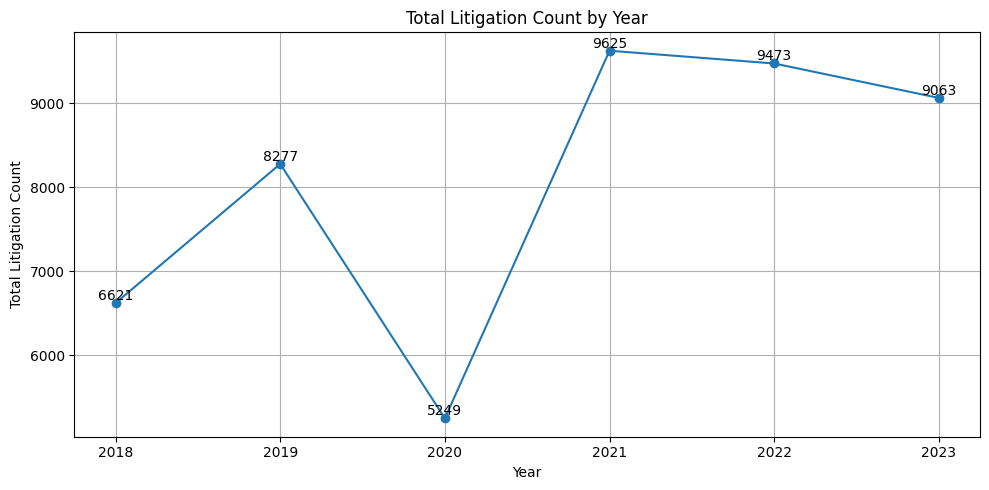

In [166]:
top_year.index = top_year.index.astype(int)

ax = top_year.plot(kind='line', marker='o', figsize=(10, 5))

for i, value in enumerate(top_year.values):
    ax.text(top_year.index[i], value, f'{int(value)}', ha='center', va='bottom')

plt.title('Total Litigation Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Litigation Count')
plt.grid(True)
plt.tight_layout()
plt.show()


Question to explore: what happened in 2020? COVID?

In [146]:
# total litigation volume per country
top_volume = df.groupby('Country of Citizenship')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_volume

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
                              ... 
Bhutan                           1
Macao SAR                        1
Iceland                          1
Solomons, The                    1
Vanuatu                          1
Name: LIT Litigation Count, Length: 180, dtype: int64

In [147]:
# trying to understand what types of decisions are made
top_decs = df.groupby('LIT Leave Decision Desc')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_decs

LIT Leave Decision Desc
Dismissed at Leave                   24843
Allowed                               9000
Discontinued - Withdrawn at Leave     8007
Discontinued - Consent at Leave       5923
Allowed - Consent                      486
Not Started at Leave                    38
No Leave Required                        9
Leave Exception                          2
Name: LIT Litigation Count, dtype: int64

In [148]:
# creating a subset of the data for the top 10 countries
top_volume.head(10)

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
Mexico                        2004
Haiti                         1658
Colombia                      1479
United States of America       901
Philippines                    660
Name: LIT Litigation Count, dtype: int64

In [149]:
top_10_countries = [
    'Nigeria', 'India', 'Iran', "People's Republic of China", 'Pakistan',
    'Mexico', 'Haiti', 'Colombia', 'United States of America', 'Philippines'
]

top_10 = df[df['Country of Citizenship'].isin(top_10_countries)]

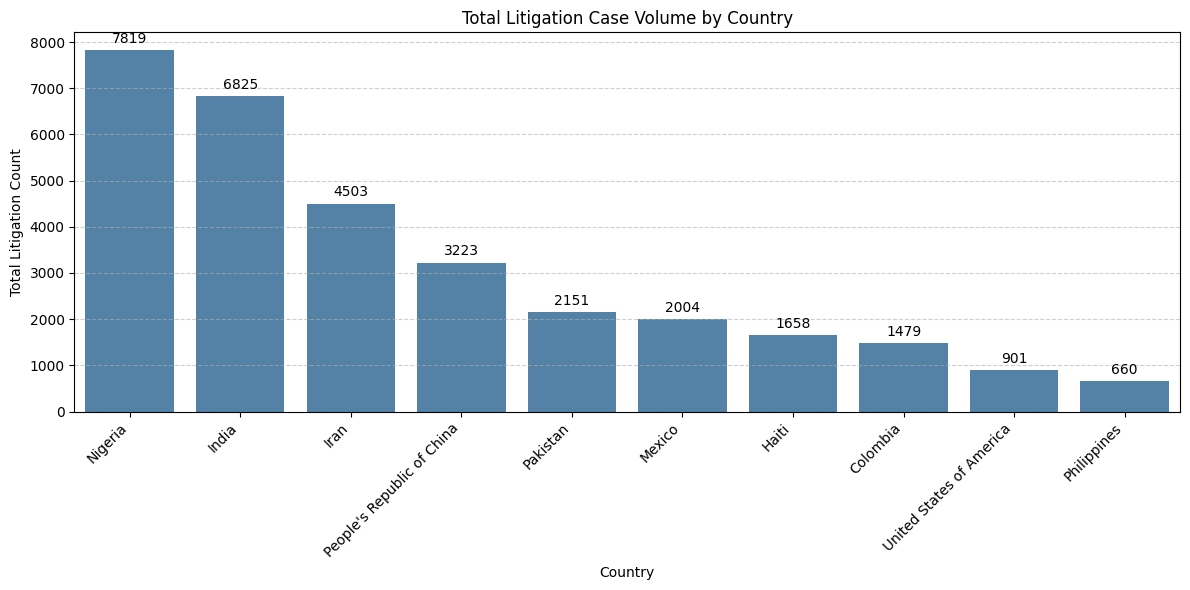

In [154]:
# Group by country
grouped = (
    top_10.groupby('Country of Citizenship')['LIT Litigation Count']
    .sum()
    .reset_index()
    .sort_values('LIT Litigation Count', ascending=False)
)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=grouped,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    color='steelblue'
)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Total Litigation Case Volume by Country')
plt.xlabel('Country')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


To have a closer look into COVID 

In [68]:
top_10 = top_10.copy()

In [69]:
def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021]:
        return 'COVID'
    elif year in [2022,  2023]:
        return 'Post-COVID'
    else:
        return 'Other'

top_10['Period'] = top_10.index.to_series().astype(int).apply(classify_period)

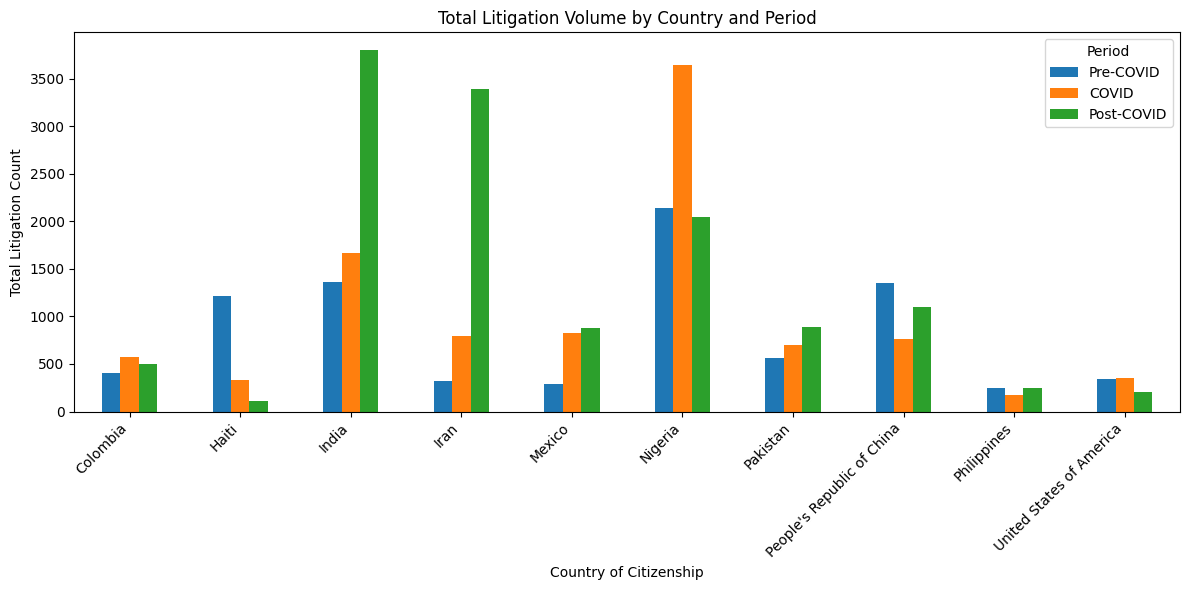

In [70]:
import matplotlib.pyplot as plt

grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Litigation Volume by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [71]:
# group by country and period, sum litigation count
grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce order
)

# normalize so each country's total = 1
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)

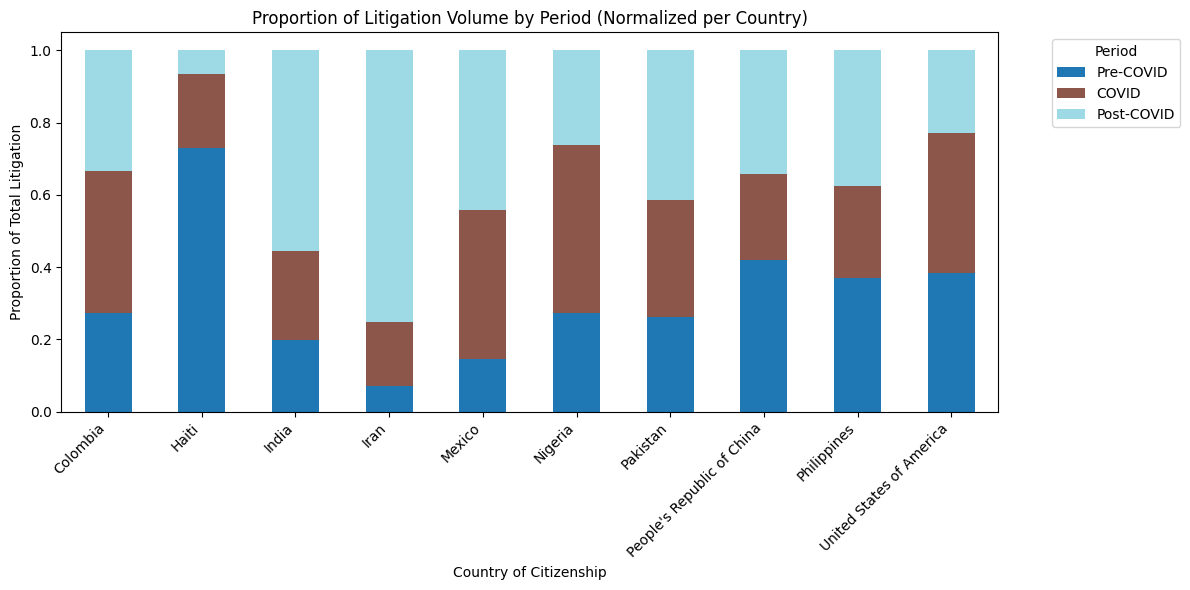

In [72]:
# plot normalized as stacked bar chart
grouped_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Proportion of Litigation Volume by Period (Normalized per Country)')
plt.xlabel('Country of Citizenship')
plt.ylabel('Proportion of Total Litigation')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights: different patterns accross the countries 

- India & Iran: surged post covid

- Nigeria: spiked during covid and reduced after

- China: declined during covid and bounced back after

Zooming in to countries of interest

In [73]:
countries_4 = [
    'Nigeria', 'India', 'Iran', "People's Republic of China"
]

top_4 = df[df['Country of Citizenship'].isin(countries_4)]
top_4['Country of Citizenship'] = top_4['Country of Citizenship'].replace("People's Republic of China", "China")

/var/folders/d4/7ppdfq6s3xb08lmv_w1fpr4m0000gn/T/ipykernel_1917/3520810741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4['Country of Citizenship'] = top_4['Country of Citizenship'].replace("People's Republic of China", "China")


In [74]:
top_4 = top_4.copy()

def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021]:
        return 'COVID'
    elif year in [2022,  2023]:
        return 'Post-COVID'
    else:
        return 'Other'

top_4['Period'] = top_4.index.to_series().astype(int).apply(classify_period)

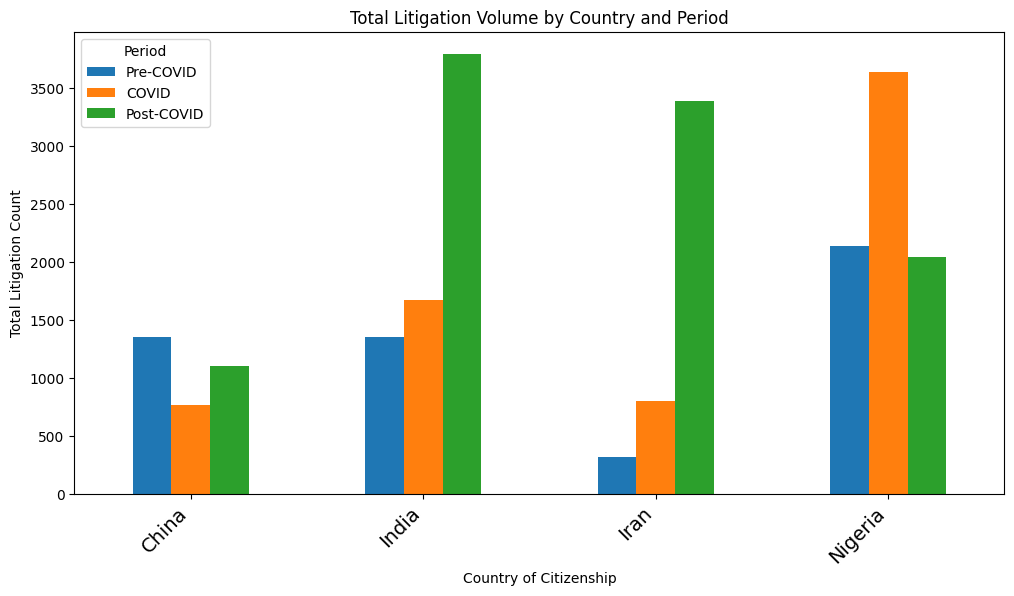

In [75]:
import matplotlib.pyplot as plt

grouped = (
    top_4.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Litigation Volume by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend(title='Period')
plt.show()

In further comparison, we use India as baseline since it has the most volume.

### Decision type comparison

Combine decision types into 4 major groups

In [76]:
decision_groups = {
    'Allowed': 'Allowed',
    'Allowed - Consent': 'Allowed',
    'Discontinued - Withdrawn at Leave': 'Discontinued',
    'Discontinued - Consent at Leave': 'Discontinued',
    'Dismissed at Leave': 'Dismissed at Leave',
}

In [77]:
df['Decision Group'] = df['LIT Leave Decision Desc'].map(decision_groups).fillna('Other')

In [78]:
df.head()

,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count,Decision Group
LIT Leave Decision Date - Year,,,,,,,,,,
2018,People's Republic of China,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Unspecified,1,Dismissed at Leave
2018,Poland,Allowed,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,GTA West IRCC,2,Allowed
2018,Tunisia,Dismissed at Leave,HC Decisions,HC Refusal-Perm Res,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,1,Dismissed at Leave
2018,St. Vincent and the Grenadines,Dismissed at Leave,RPD Decisions,RPD-Not CR/Protected Person,Person Concerned,Federal Court,Inland,Unspecified,10,Dismissed at Leave
2018,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,5,Dismissed at Leave


### Comparing India & Nigeria

In [79]:
# Select relevant countries
subset = df[df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"])].copy()

# Normalize litigation count within each (country, year)
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0, 1])
    .apply(lambda x: x / x.sum())
)

# Pivot to wide format
pivot = grouped.unstack(fill_value=0)

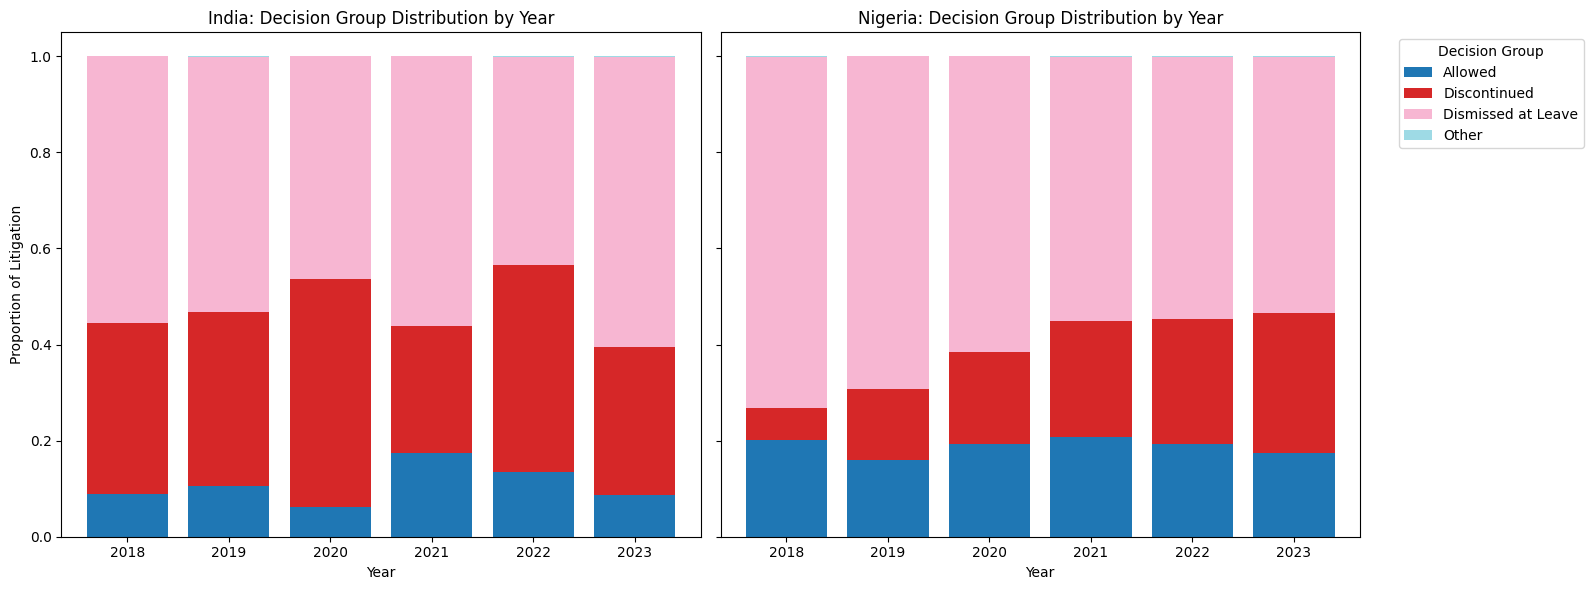

In [80]:
import matplotlib.pyplot as plt

india_case = pivot.loc['India'].copy()
nigeria_case = pivot.loc['Nigeria'].copy()
india_case.index = india_case.index.get_level_values(0)
nigeria_case.index = nigeria_case.index.get_level_values(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Decision Group Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

nigeria_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('Nigeria: Decision Group Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Decision Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


| Feature                | **India**                                               | **Nigeria**                                                    |
|------------------------|----------------------------------------------------------|----------------------------------------------------------------|
| **Dominant Decision**  | *Dismissed at Leave* remains the largest group.         | *Dismissed at Leave* is also dominant but gradually declining. |
| **Allowed Proportion** | Fluctuates; peaked in 2021, drops again in 2023.        | Consistently higher than India; relatively stable.             |
| **Discontinued Trend** | Grew in 2020–2022, then dropped in 2023.                | Gradually increased since 2018, steady in recent years.        |
| **Overall Shift**      | Higher variability in proportions year to year.         | More stable pattern overall across years.                      |
| **Insight**            | Legal outcomes in India appear more volatile over time. | Nigeria exhibits steadier handling of litigation cases.        |

- For Nigeria: the proportion of discountinued cases increases over the year, why?

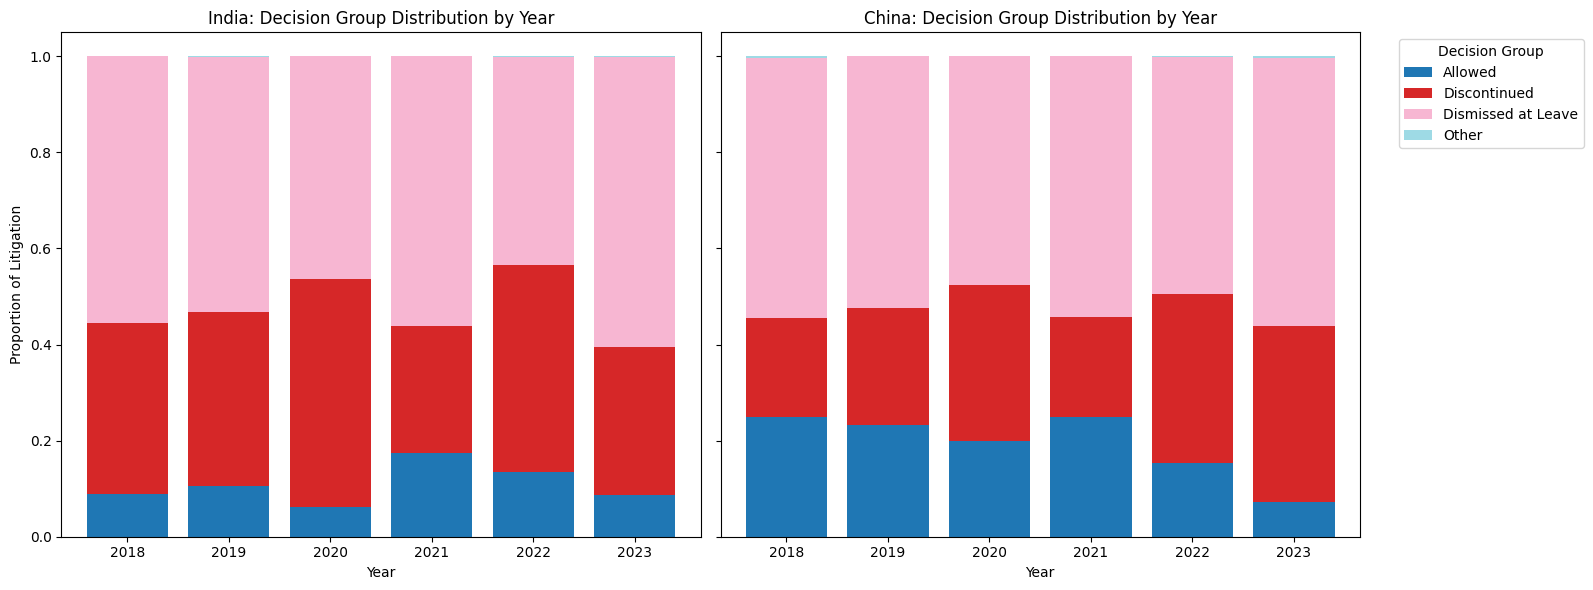

In [81]:
china_case = pivot.loc["People's Republic of China"].copy()
china_case.index = china_case.index.get_level_values(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Decision Group Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

china_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('China: Decision Group Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Decision Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

| Feature                | **India**                                               | **China**                                                     |
|------------------------|----------------------------------------------------------|---------------------------------------------------------------|
| **Dominant Decision**  | *Dismissed at Leave* consistently dominates.             | *Dismissed at Leave* also dominant, but to a slightly lesser extent. |
| **Allowed Proportion** | Fluctuates; highest in 2021, drops notably in 2023.      | Relatively high and stable until a sharp drop in 2023.        |
| **Discontinued Trend** | Rises in 2020–2022, dips again in 2023.                  | Moderate and steady across years, becoming slightly more prevalent. |
| **Overall Shift**      | More volatility year over year.                          | Smoother transitions in proportions across years.             |
| **Insight**            | Litigation outcomes in India show higher year-to-year fluctuation. | China maintains more stable trends in litigation decisions, until 2023    |


- For China: something happened in 2023, what is it? 

### Case Type Comparison

### Comparing India & Nigeria

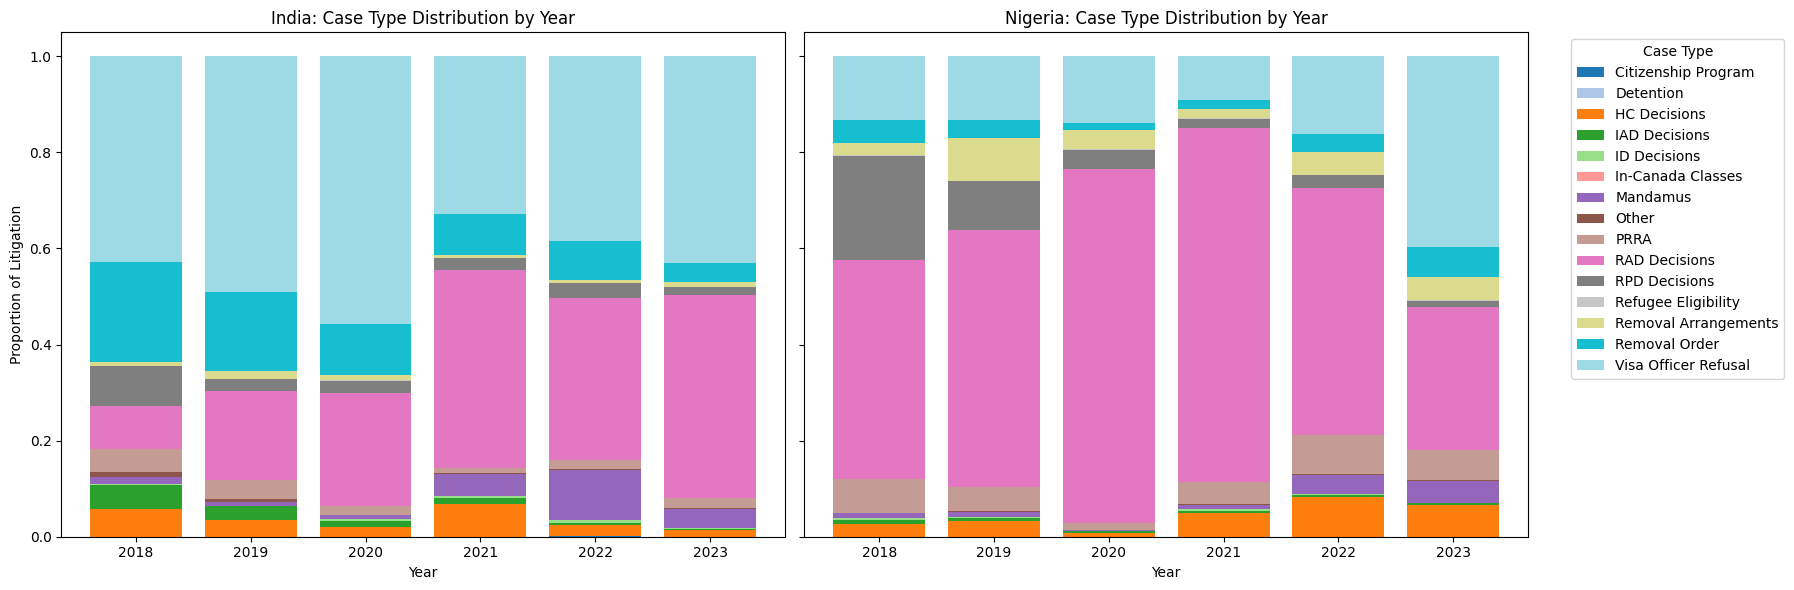

In [129]:
import matplotlib.pyplot as plt

# Filter for India and Nigeria
subset = df[df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China", "Iran"])].copy()

# Group by Country, Year, and Case Type, then sum
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0,1])
    .apply(lambda x: x / x.sum())  # normalize within each country-year
)

# Pivot to wide format for each country
pivot = grouped.unstack(fill_value=0)
india_case = pivot.loc['India']
nigeria_case = pivot.loc['Nigeria']

# Clean index to just year
india_case.index = india_case.index.get_level_values(0)
nigeria_case.index = nigeria_case.index.get_level_values(0)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# India
india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Case Type Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# Nigeria
nigeria_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('Nigeria: Case Type Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 📊 Case Type Comparison Summary: India vs. Nigeria (2018–2023)

| Aspect                      | 🇮🇳 India                                                          | 🇳🇬 Nigeria                                                            |
|----------------------------|--------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Dominant Case Types**    | Visa Officer Refusal, Removal Order                               | RAD Decisions (Refugee Appeal Division)                              |
| **Diversity of Case Types**| High — includes HC, IAD, Mandamus, Citizenship, etc.              | Low — RAD dominates, other types have very small shares              |
| **Stability Over Time**    | Fairly stable distribution across years                           | Slight diversification post-2021, but RAD remains heavily dominant   |
| **Other Observations**     | Litigation reflects broader immigration policy enforcement trends | Heavy concentration suggests refugee system strain or appeal volume  |
| **Policy Signals**         | Appeals and removals common; procedural variation across types    | Signals pressure on refugee processing and consistency of decisions  |


Key Insights:

- Nigeria’s litigation is highly concentrated in refugee-related cases.

- India’s litigation is more diverse, often involving visa refusals, removal orders, and more administrative decisions.

- The consistency in India's mix suggests a more stable litigation source across immigration categories.

- The dominance of RAD in Nigeria may point to systemic refugee claim challenges or stricter asylum scrutiny.

##### Yearly Case Type Trends (2018–2023)

| Country | Period         | Notable Trends                                                                 |
|---------|----------------|---------------------------------------------------------------------------------|
| 🇮🇳 India   | 2018–2020      | Consistent dominance of *Visa Officer Refusal* and *Removal Order* cases.       |
|         | 2021           | Increase in "Other" types (e.g. HC Decisions, Discontinued) — pandemic impact. |
|         | 2022–2023      | Litigation mix stabilizes again; HC involvement slightly rises.                |
| 🇳🇬 Nigeria | 2018–2020      | Overwhelming share of *RAD Decisions* (refugee appeals).                         |
|         | 2021–2022      | Small rise in *Removal*, *Refugee Eligibility*, and other case types.          |
|         | 2023           | RAD remains dominant but slight diversification persists.                      |


Insights: 

- India shows a stable and diverse litigation mix over time.

- Nigeria shows a single-case-type dominance (RAD) that loosens slightly post-COVID, suggesting either backlog relief or shifting litigation trends.

### Comparing India and China

Case Type Comparison (Case Type Group Desc)

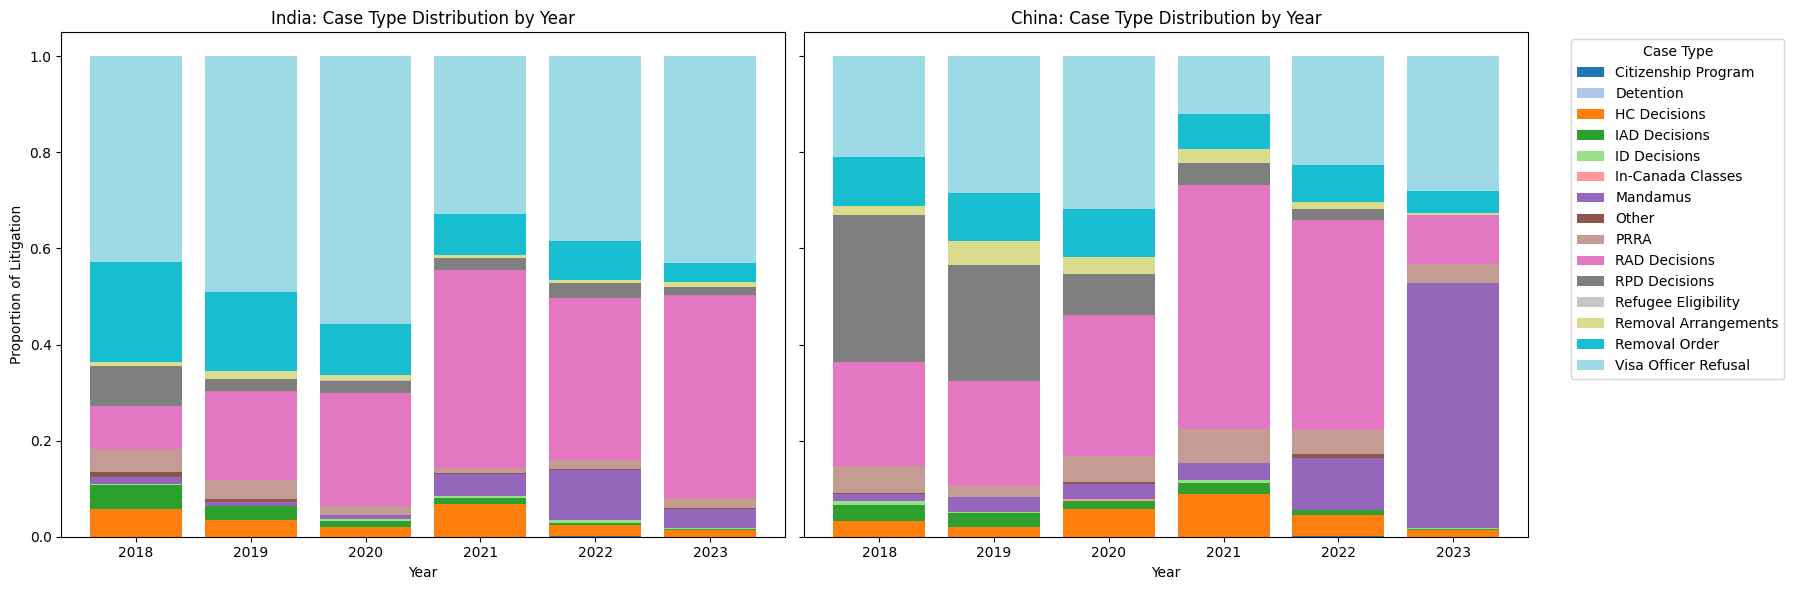

In [83]:
# Group by Country, Year, and Case Type, then sum
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0,1])
    .apply(lambda x: x / x.sum())  # normalize within each country-year
)

# Pivot to wide format for each country
pivot = grouped.unstack(fill_value=0)
india_case = pivot.loc['India']
china_case = pivot.loc["People's Republic of China"]

# Clean index to just year
india_case.index = india_case.index.get_level_values(0)
china_case.index = china_case.index.get_level_values(0)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# India
india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Case Type Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# China
china_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('China: Case Type Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Somehow similar patterns until 2023, when Mandamus surged in China - what happened?

Mandamus: Legal remedy used when an application has been delayed or improperly handled by immigration authority.

### 📊 Case Type Comparison Summary: India vs. China (2018–2023)

| **Aspect**              | 🇮🇳 India                                      | 🇨🇳 China                                               |
|-------------------------|-----------------------------------------------|--------------------------------------------------------|
| **Dominant Case Types** | Visa Officer Refusal, RPD, RAD, Removal Order | RAD Decisions, Mandamus (2023), PRRA, RPD              |
| **Diversity of Case Types** | High — includes HC, IAD, Mandamus, Citizenship, etc. | Moderate — lower diversity until 2023; Mandamus rises |
| **Stability Over Time** | Fairly stable litigation mix year to year     | Shift in 2023 — Mandamus surge shifts proportions      |
| **Other Observations**  | Reflects broader immigration enforcement      | 2023 spike may indicate systemic delay or pressure     |
| **Policy Signals**      | Appeals and removals steady over time         | Mandamus rise suggests delays in decision-making       |


Insights

- India’s litigation remains relatively stable and diverse, with consistent presence of visa refusals and refugee-related appeals.
- China showed a comparable litigation pattern until 2022, but 2023 marks a notable shift with a sharp rise in Mandamus applications.
- The Mandamus spike in China (2023) could indicate:
- Backlogs in application processing.
- Legal pressure for delayed decisions.
- Policy bottlenecks (e.g. post-COVID recovery or shifting IRCC priorities).
- The proportional drop in Visa Officer Refusals in China suggests possible procedural shifts or temporary case backlogs in that stream.
- India’s stability might reflect a broader and predictable stream of administrative decisions, while China’s volatility suggests changing litigation incentives or access dynamics.

### Comparing India and Iran

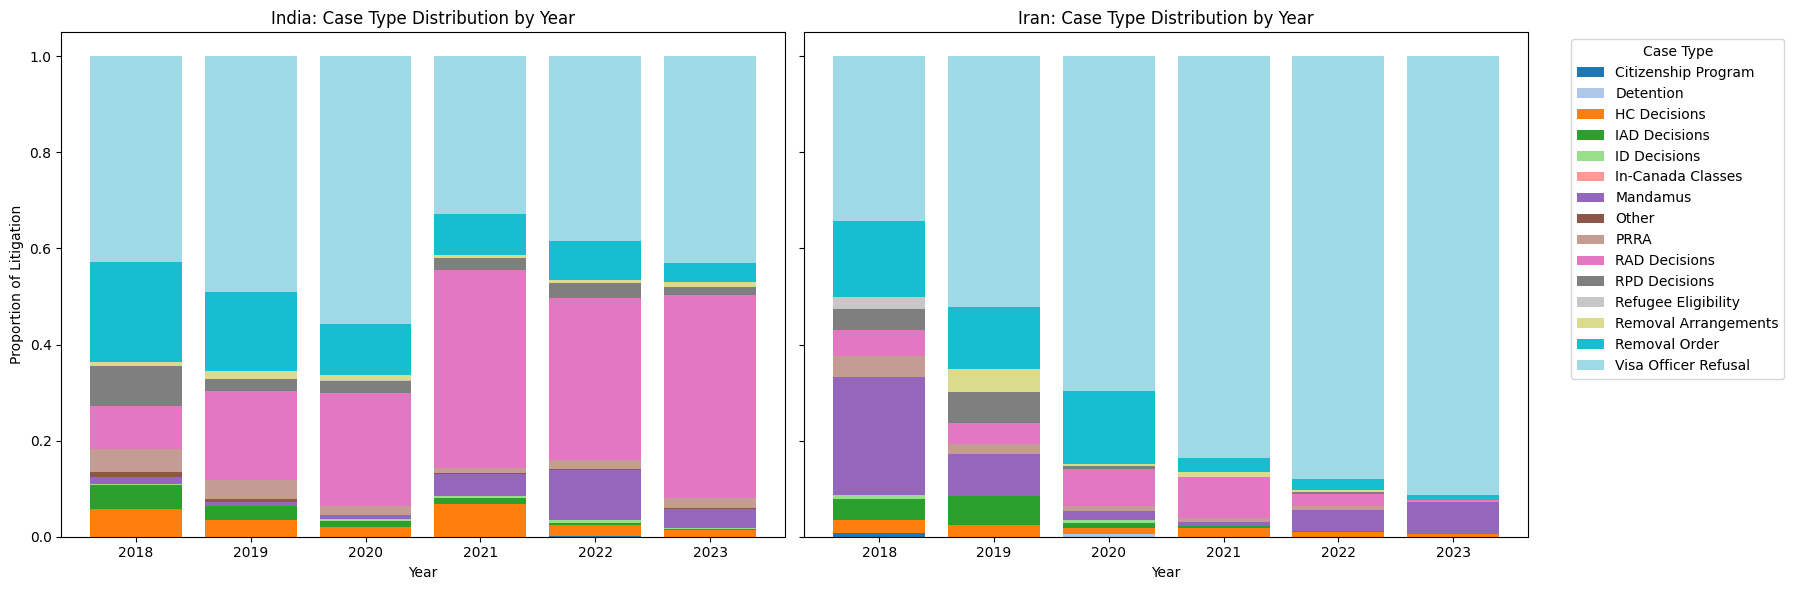

In [130]:
# Group by Country, Year, and Case Type, then sum
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0,1])
    .apply(lambda x: x / x.sum())  # normalize within each country-year
)

# Pivot to wide format for each country
pivot = grouped.unstack(fill_value=0)
india_case = pivot.loc['India']
iran_case = pivot.loc["Iran"]

# Clean index to just year
india_case.index = india_case.index.get_level_values(0)
iran_case.index = iran_case.index.get_level_values(0)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# India
india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Case Type Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# China
iran_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('Iran: Case Type Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Trend by Year

##### Decision Types

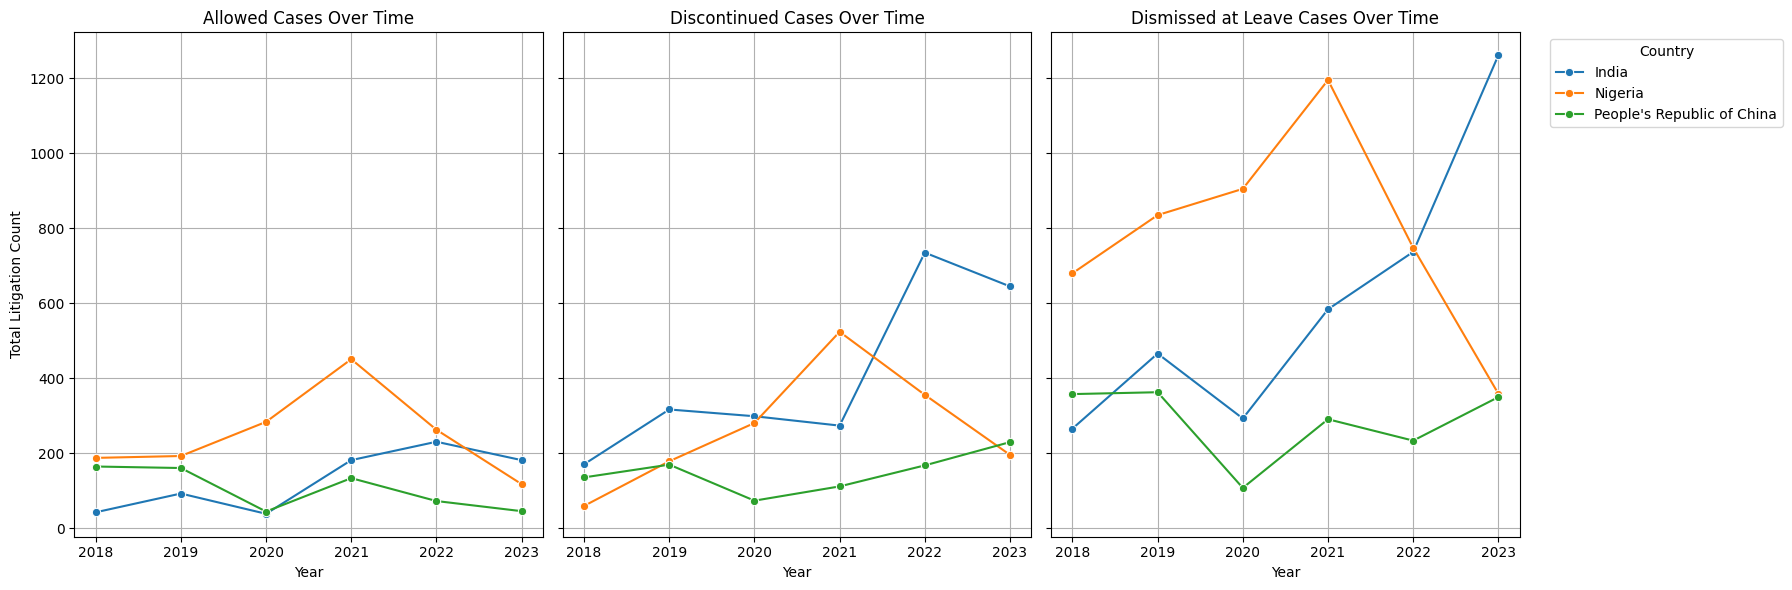

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant data
df_filtered = df[
    df['Decision Group'].isin(['Discontinued', 'Dismissed at Leave', 'Allowed']) & 
    df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"])
]

# Group the data
grouped = (
    df_filtered
    .groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

decision_groups = ['Allowed', 'Discontinued', 'Dismissed at Leave']

for i, case in enumerate(decision_groups):
    sns.lineplot(
        data=grouped[grouped['Decision Group'] == case],
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{case} Cases Over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Litigation Count' if i == 0 else '')
    axes[i].grid(True)

# Move legend to the third plot only
for i in range(2):
    axes[i].legend_.remove()
axes[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- The volumn for Dimissed at Leave dominates accross all decision types, followed by Discontinued.
- For Nigeria, a sharp drop across all decision types since 2021 - something happened in Nigeria in 2021? 
- For India, a significant raise in Discontinued since 2021 and Dismissed at Leave since 2020 - Allowed also raise, seems fine?
- For China, shifting from Allowed to Discontinued and Dismissed at Leave - must have been some policy changes regarding immigration for China?

##### Case Types
only inclueded case types with total litigation count over 100 for at least one country

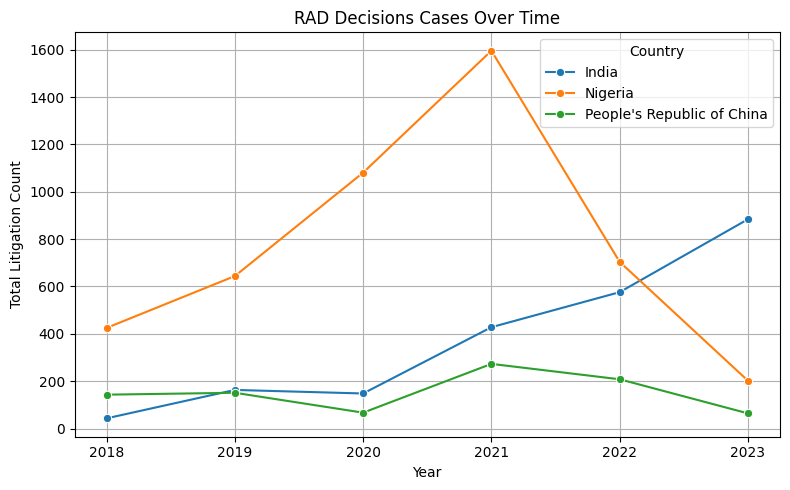

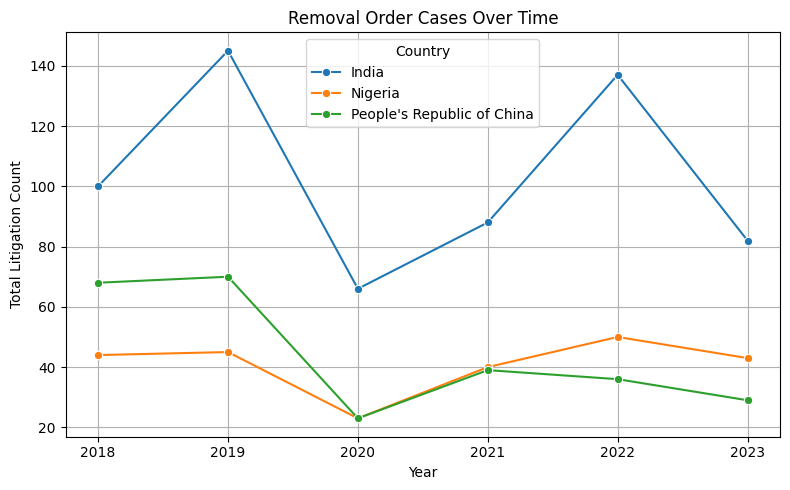

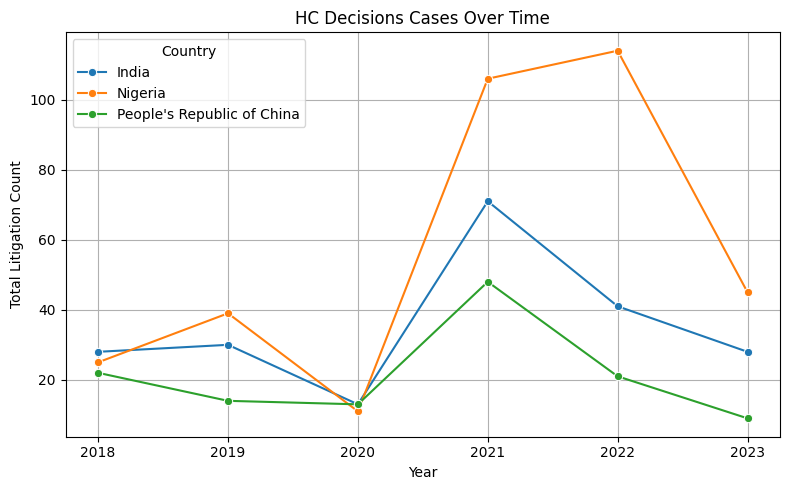

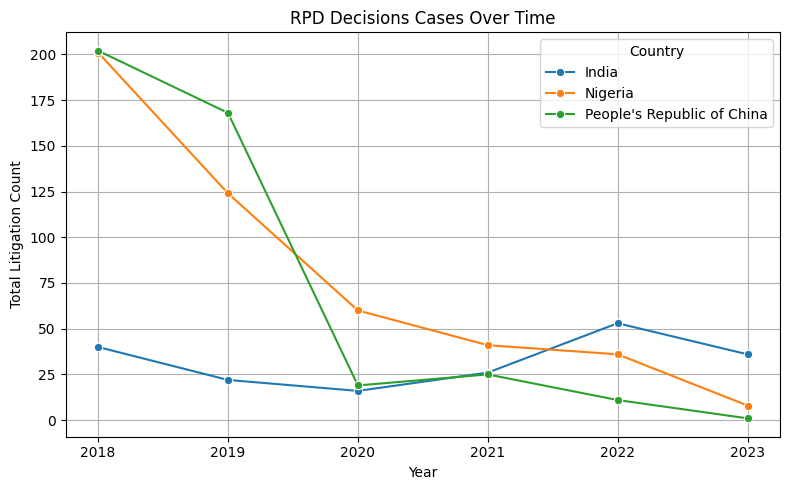

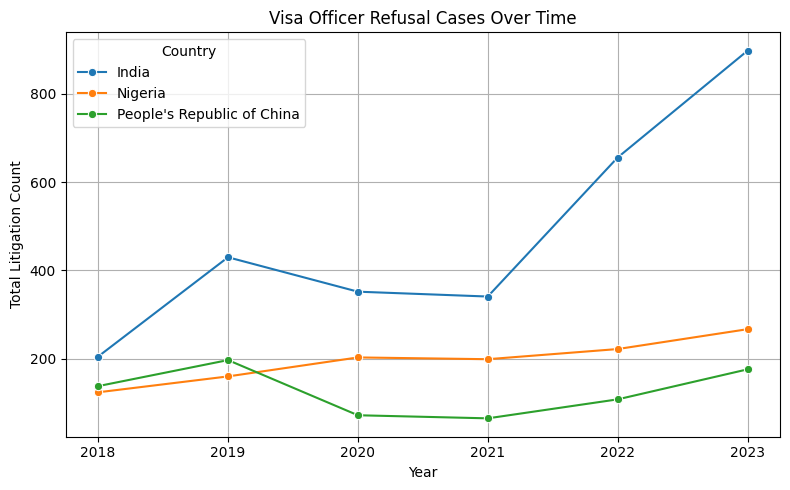

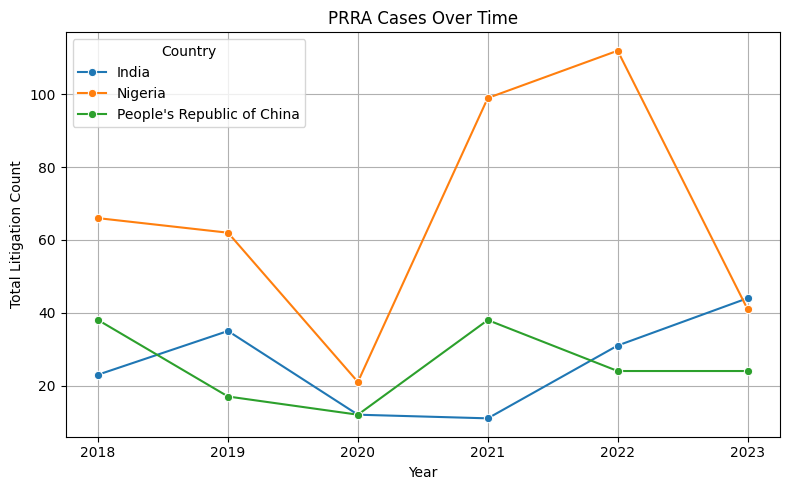

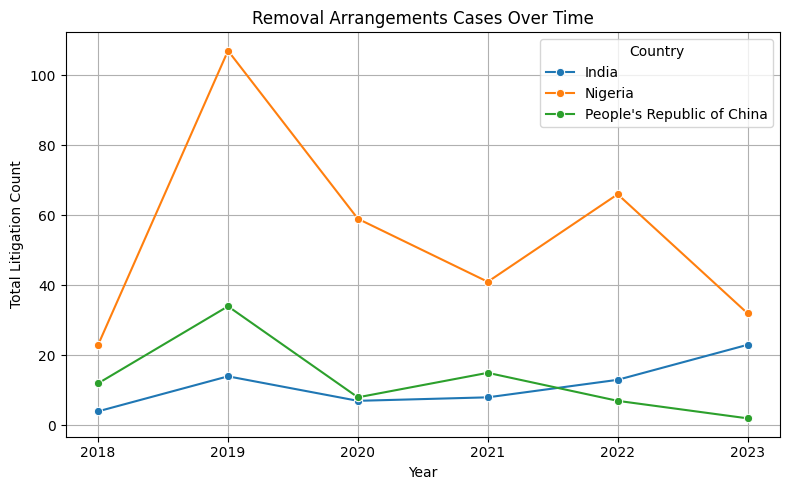

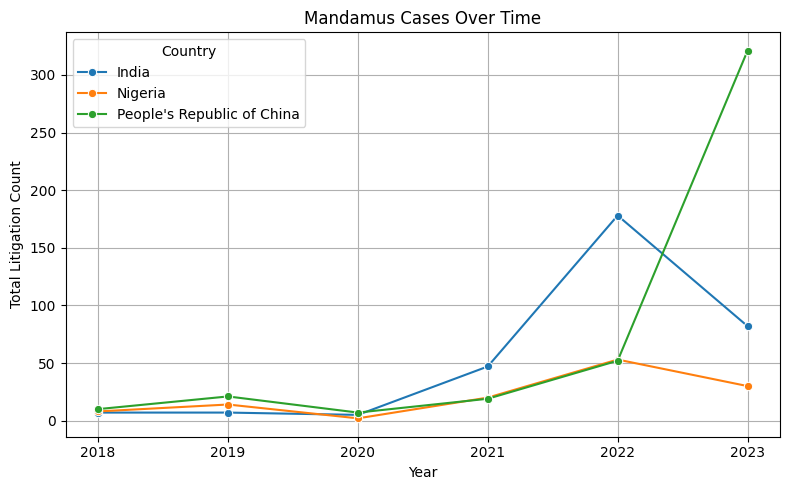

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the case types to include
included_case_types = [
    'RAD Decisions', 'Removal Order', 'HC Decisions', 'RPD Decisions',
    'Visa Officer Refusal', 'PRRA', 'Removal Arrangements', 'Mandamus'
]

# Filter relevant data
subset = df[
    df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"]) &
    df['LIT Case Type Group Desc'].isin(included_case_types)
].copy()

# Group by year, country, and case type — sum counts
grouped = (
    subset.groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Plot one chart per selected case type
for case_type in included_case_types:
    data = grouped[grouped['LIT Case Type Group Desc'] == case_type]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=data,
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o'
    )
    plt.title(f'{case_type} Cases Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Litigation Count')
    plt.grid(True)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

- RAD (Refugee Appeal Division) Decision dominants for all 3 countries. Since 2021, it droped for Nigeria (sharply) and China, but increased for India.
- Didn't look too much into the rest because of the low volume.

### Filtering out refugee cases

In [86]:
refugee_case_types = [
    'RPD Decisions',
    'RAD Decisions',
    'PRRA',
    'Refugee Eligibility'
]

# Filter out refugee-related case types
nonR_df = df[~df['LIT Case Type Group Desc'].isin(refugee_case_types)]

##### Trend by Year

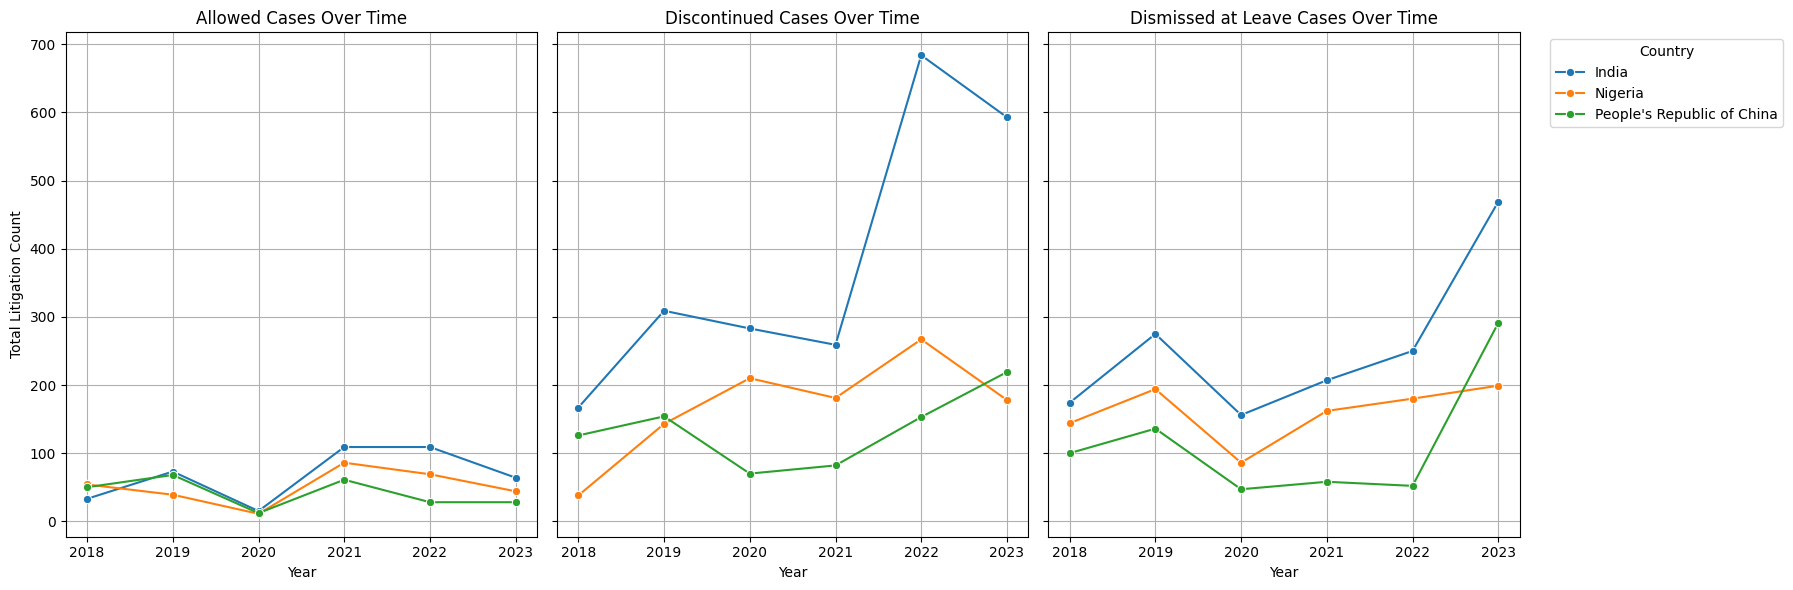

In [115]:
# Filter relevant data
df_filtered = nonR_df[
    nonR_df['Decision Group'].isin(['Discontinued', 'Dismissed at Leave', 'Allowed']) & 
    nonR_df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"])
]

# Group the data
grouped = (
    df_filtered
    .groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

decision_groups = ['Allowed', 'Discontinued', 'Dismissed at Leave']

for i, case in enumerate(decision_groups):
    sns.lineplot(
        data=grouped[grouped['Decision Group'] == case],
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{case} Cases Over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Litigation Count' if i == 0 else '')
    axes[i].grid(True)

# Move legend to the third plot only
for i in range(2):
    axes[i].legend_.remove()
axes[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Intepretation: exluding the refugee cases, we see very different patterns. 
- Allowed: actually increased for all 3 countries during covid (since 2020), and slightly dropped for India and Nigeria
- Discontinued: a huge jump for India in 2021, why? (Could be a result of a raise in total number of application, need to cross check with other dataset)
- Dismissed at Leave: increased for all 3 countries since 2020, a sharp raise in 2022 for China and India

### Decision Type Comparison

In [120]:
# Select relevant countries from filtered data
subset = df_filtered[df_filtered['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China","Iran"])].copy()

# Normalize litigation count within each (country, year)
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0, 1])
    .apply(lambda x: x / x.sum())
)

# Pivot to wide format
pivot = grouped.unstack(fill_value=0)

### India vs. Nigeria

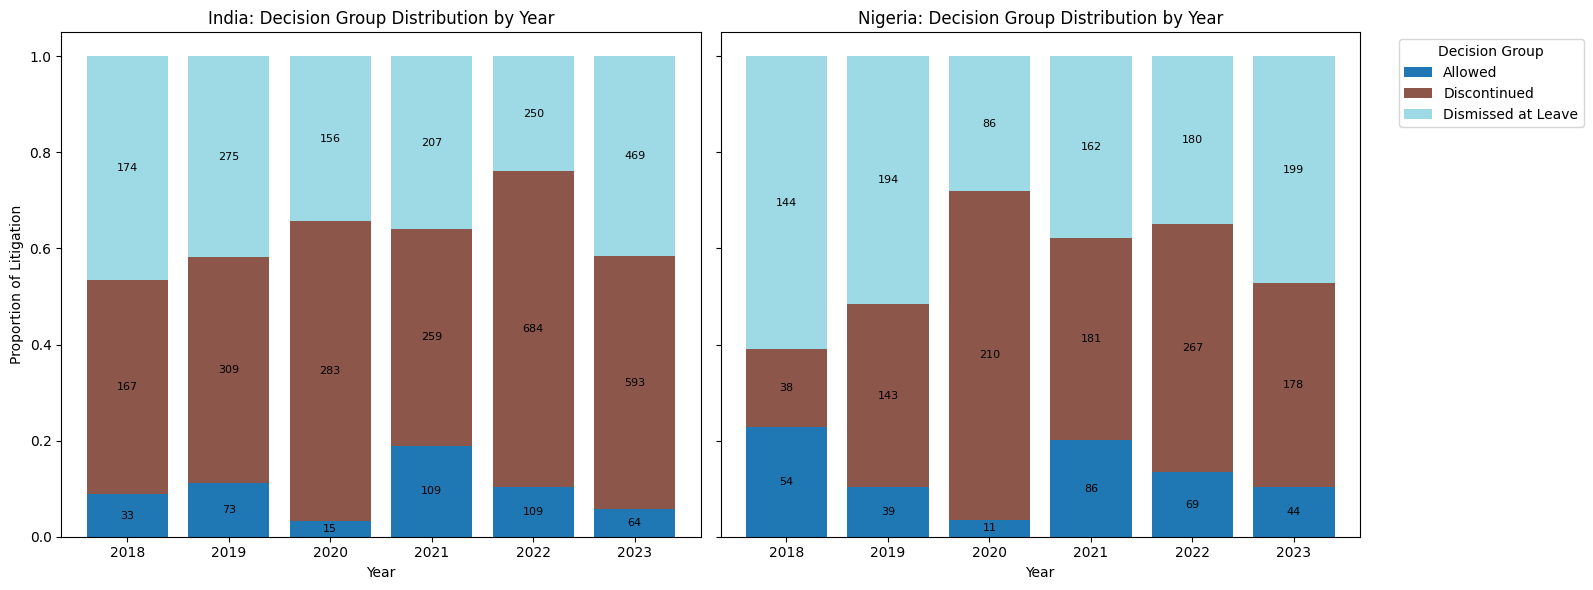

In [121]:
# Step 1: Compute absolute counts (not normalized)
absolute_counts = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
)

# Step 2: Normalize to get proportions (your existing pivot)
proportions = absolute_counts.div(absolute_counts.sum(axis=1), axis=0)

# Step 3: Split by country
nr_india_prop = proportions.loc['India'].copy()
nr_nigeria_prop = proportions.loc['Nigeria'].copy()
nr_india_abs = absolute_counts.loc['India'].copy()
nr_nigeria_abs = absolute_counts.loc['Nigeria'].copy()

# Reset index levels
nr_india_prop.index = nr_india_prop.index.get_level_values(0)
nr_nigeria_prop.index = nr_nigeria_prop.index.get_level_values(0)
nr_india_abs.index = nr_india_abs.index.get_level_values(0)
nr_nigeria_abs.index = nr_nigeria_abs.index.get_level_values(0)

# Step 4: Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# India subplot
nr_india_prop.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Decision Group Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# Add absolute count labels for India
for idx, year in enumerate(nr_india_abs.index):
    cum_height = 0
    for col in nr_india_abs.columns:
        count = nr_india_abs.loc[year, col]
        if count > 0:
            height = nr_india_prop.loc[year, col]
            axes[0].text(idx, cum_height + height / 2, str(int(count)),
                         ha='center', va='center', fontsize=8, color='black')
            cum_height += height

# Nigeria subplot
nr_nigeria_prop.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('Nigeria: Decision Group Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Decision Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add absolute count labels for Nigeria
for idx, year in enumerate(nr_nigeria_abs.index):
    cum_height = 0
    for col in nr_nigeria_abs.columns:
        count = nr_nigeria_abs.loc[year, col]
        if count > 0:
            height = nr_nigeria_prop.loc[year, col]
            axes[1].text(idx, cum_height + height / 2, str(int(count)),
                         ha='center', va='center', fontsize=8, color='black')
            cum_height += height

plt.tight_layout()
plt.show()


The difference in Discontinued case for Nigeria does not seem obvious after removal of the refugee cases

### India vs. China

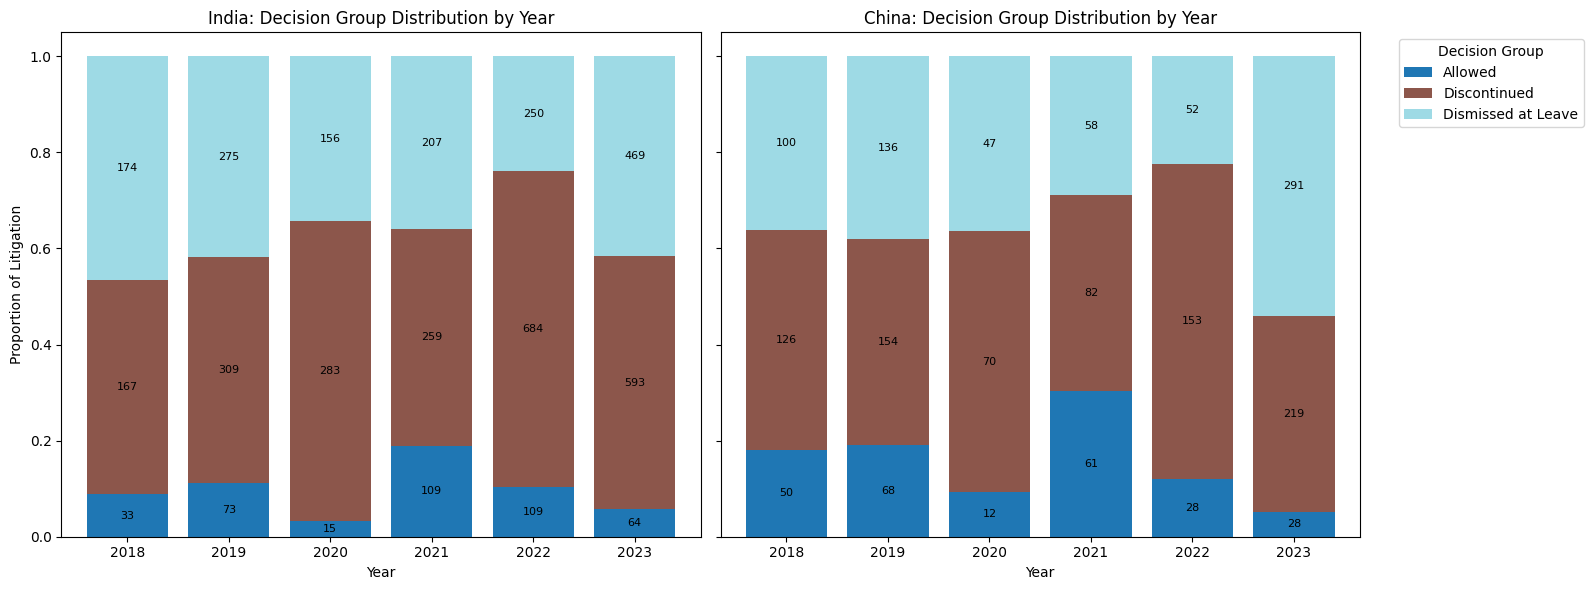

In [122]:
# Step 1: Compute absolute counts
absolute_counts = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
)

# Step 2: Normalize proportions for plotting
proportions = absolute_counts.div(absolute_counts.sum(axis=1), axis=0)

# Step 3: Extract data by country
nr_india_prop = proportions.loc['India'].copy()
nr_china_prop = proportions.loc["People's Republic of China"].copy()
nr_india_abs = absolute_counts.loc['India'].copy()
nr_china_abs = absolute_counts.loc["People's Republic of China"].copy()

# Reset index to just the year
nr_india_prop.index = nr_india_prop.index.get_level_values(0)
nr_china_prop.index = nr_china_prop.index.get_level_values(0)
nr_india_abs.index = nr_india_abs.index.get_level_values(0)
nr_china_abs.index = nr_china_abs.index.get_level_values(0)

# Step 4: Plot with labels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- India ---
nr_india_prop.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Decision Group Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# Add absolute count labels for India
for idx, year in enumerate(nr_india_abs.index):
    cum_height = 0
    for col in nr_india_abs.columns:
        count = nr_india_abs.loc[year, col]
        if count > 0:
            height = nr_india_prop.loc[year, col]
            axes[0].text(idx, cum_height + height / 2, str(int(count)),
                         ha='center', va='center', fontsize=8, color='black')
            cum_height += height

# --- China ---
nr_china_prop.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('China: Decision Group Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Decision Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add absolute count labels for China
for idx, year in enumerate(nr_china_abs.index):
    cum_height = 0
    for col in nr_china_abs.columns:
        count = nr_china_abs.loc[year, col]
        if count > 0:
            height = nr_china_prop.loc[year, col]
            axes[1].text(idx, cum_height + height / 2, str(int(count)),
                         ha='center', va='center', fontsize=8, color='black')
            cum_height += height

plt.tight_layout()
plt.show()

Similar patterns, except for China, proportion of Dismissed at Leave cases increased a little since 2022. 

### Iran - May 29th

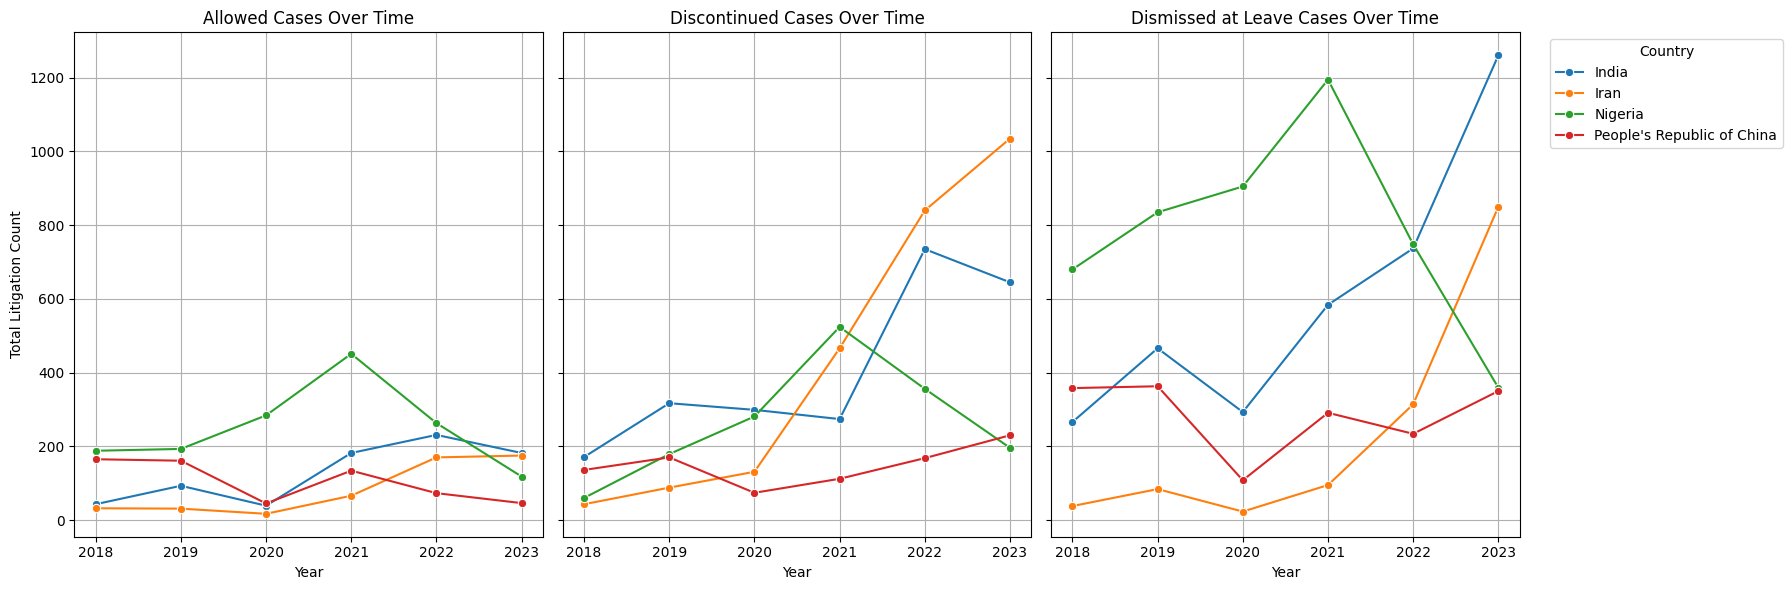

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant data
df_filtered = df[
    df['Decision Group'].isin(['Discontinued', 'Dismissed at Leave', 'Allowed']) & 
    df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China", "Iran"])
]

# Group the data
grouped = (
    df_filtered
    .groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

decision_groups = ['Allowed', 'Discontinued', 'Dismissed at Leave']

for i, case in enumerate(decision_groups):
    sns.lineplot(
        data=grouped[grouped['Decision Group'] == case],
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{case} Cases Over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Litigation Count' if i == 0 else '')
    axes[i].grid(True)

# Move legend to the third plot only
for i in range(2):
    axes[i].legend_.remove()
axes[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Discontinued cases surged for Iran since 2020

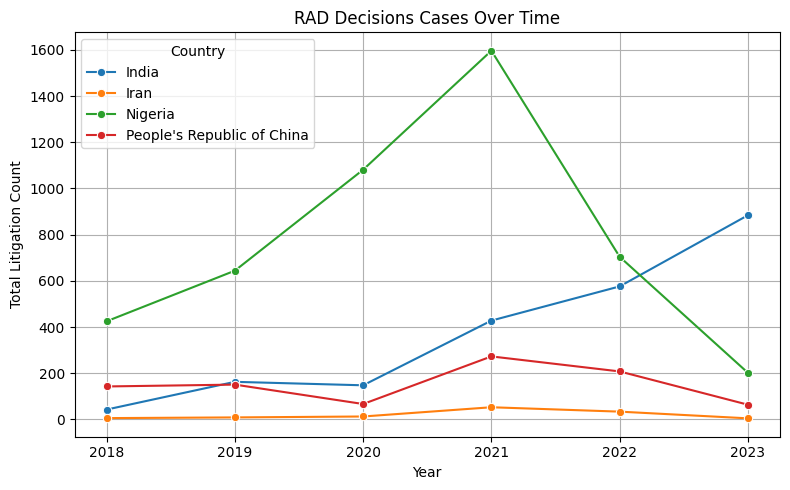

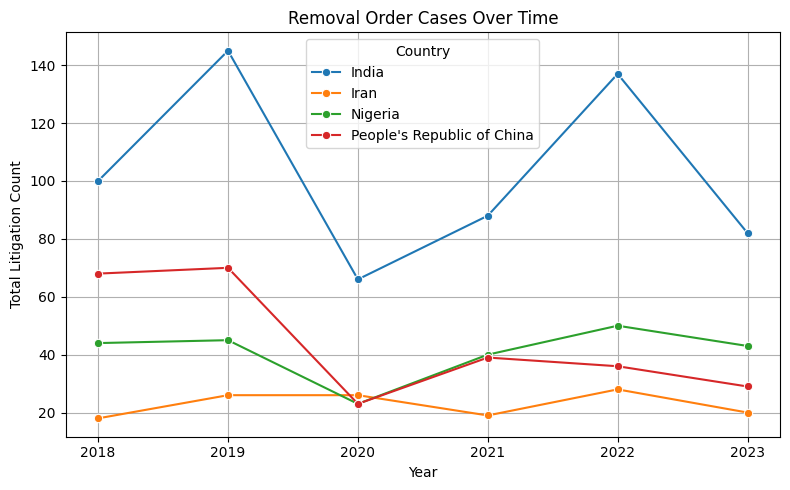

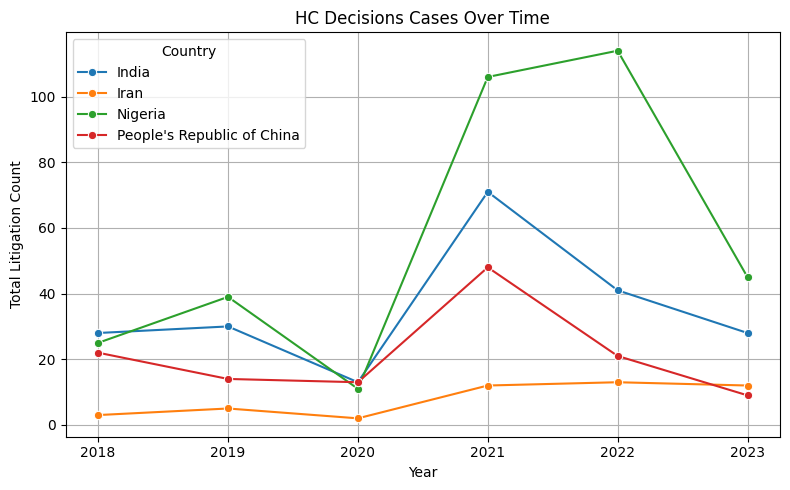

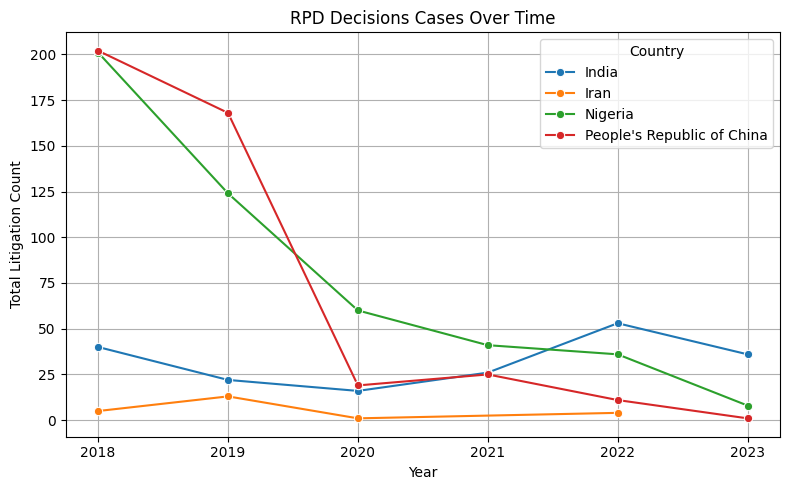

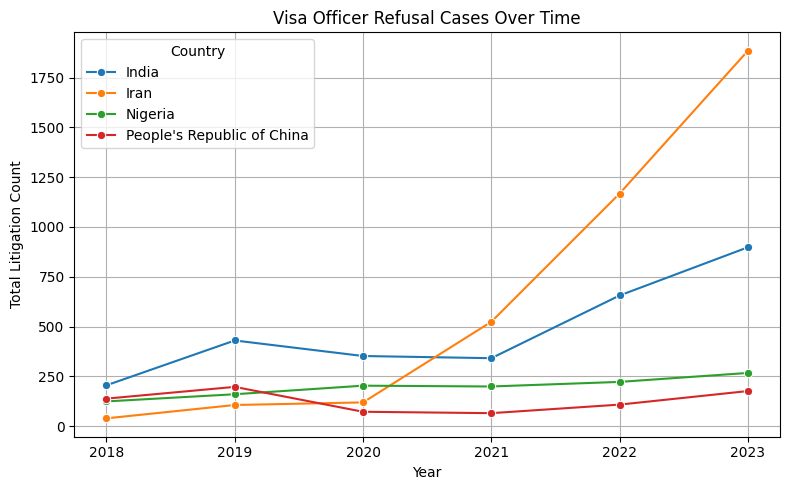

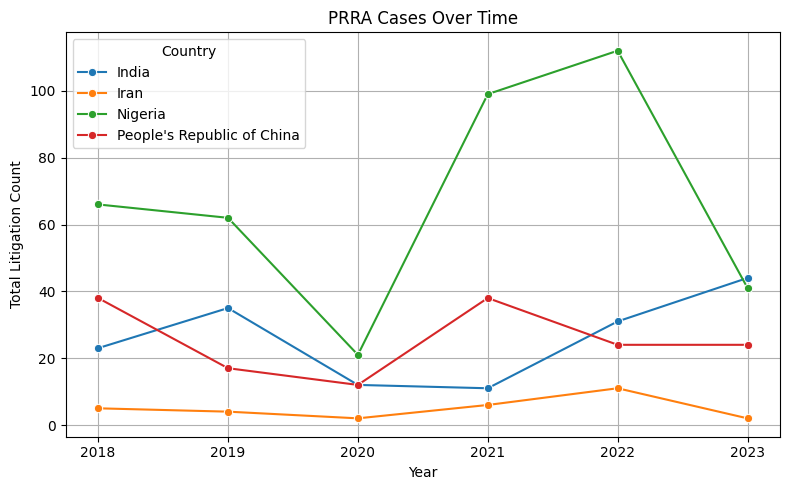

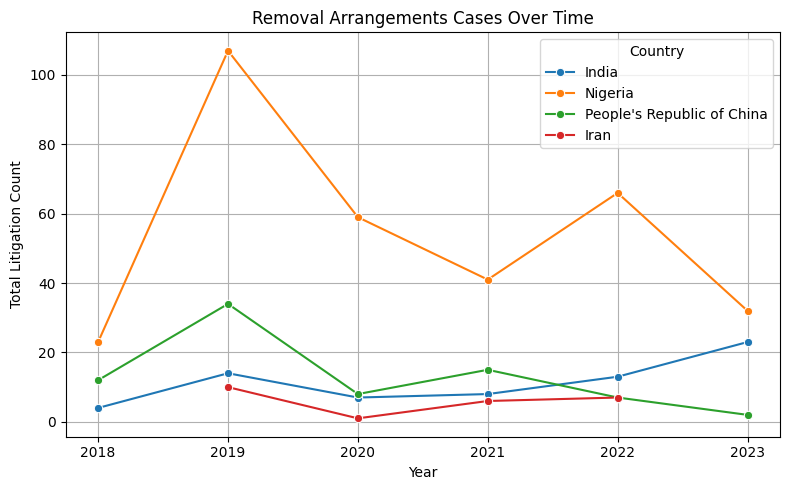

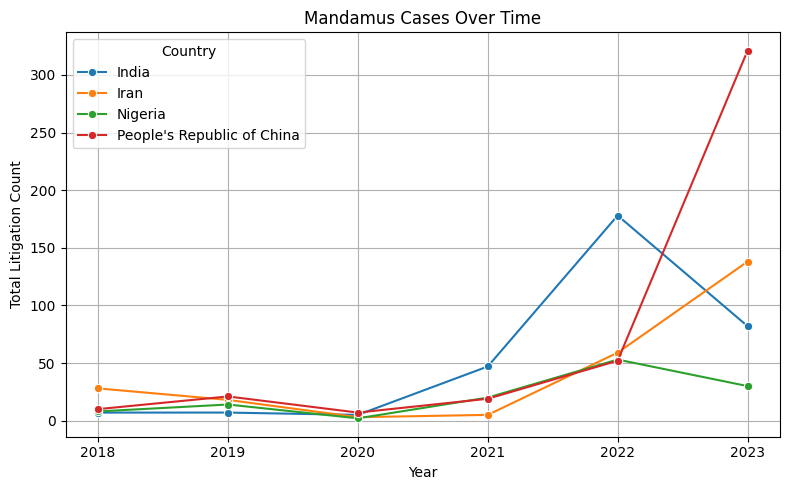

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the case types to include
included_case_types = [
    'RAD Decisions', 'Removal Order', 'HC Decisions', 'RPD Decisions',
    'Visa Officer Refusal', 'PRRA', 'Removal Arrangements', 'Mandamus'
]

# Filter relevant data
subset = df[
    df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China", "Iran"]) &
    df['LIT Case Type Group Desc'].isin(included_case_types)
].copy()

# Group by year, country, and case type — sum counts
grouped = (
    subset.groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Plot one chart per selected case type
for case_type in included_case_types:
    data = grouped[grouped['LIT Case Type Group Desc'] == case_type]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=data,
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o'
    )
    plt.title(f'{case_type} Cases Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Litigation Count')
    plt.grid(True)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

- The increase in cases for Iran mainly come from Visa Officer Refusal cases, increasing since 2020
- Mandamus Cases also increase significantly for Iran since 2021

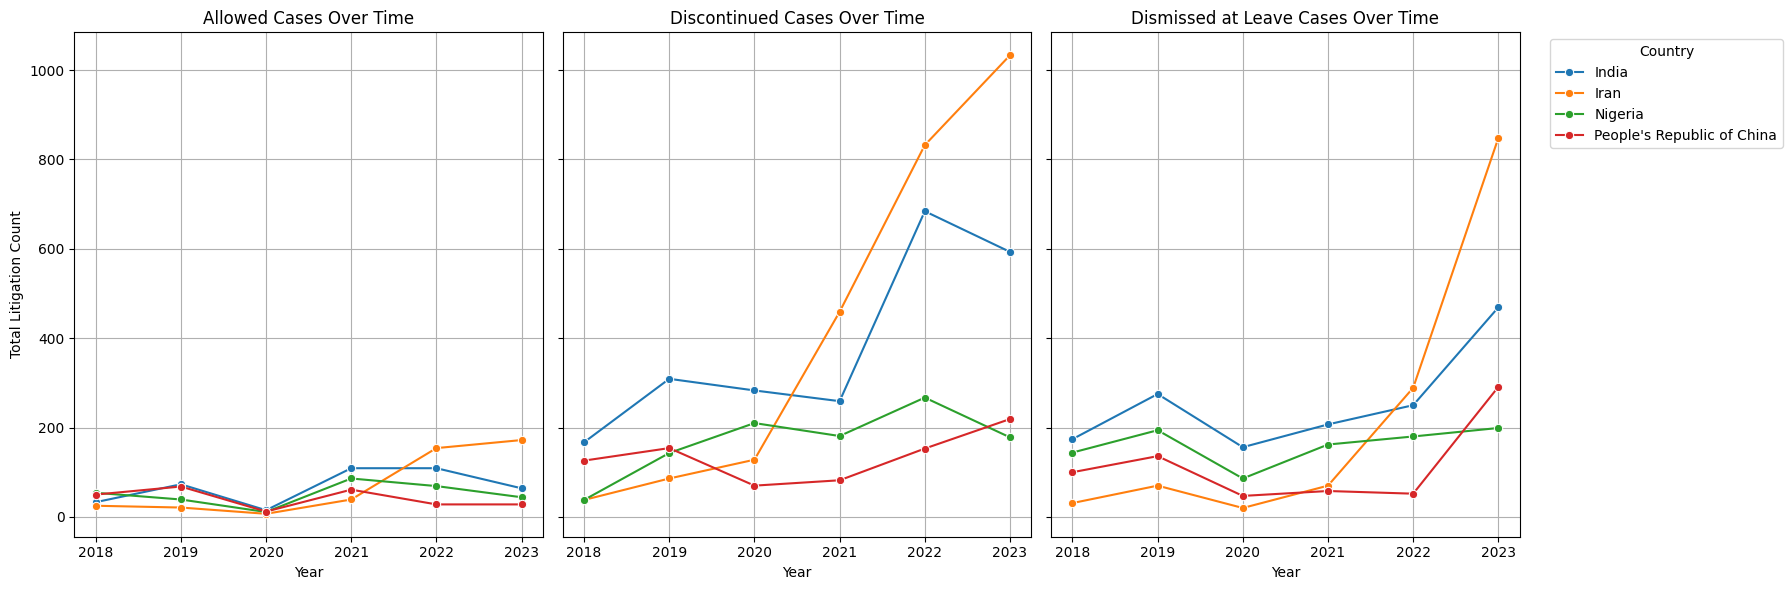

In [127]:
# Filter relevant data
df_filtered = nonR_df[
    nonR_df['Decision Group'].isin(['Discontinued', 'Dismissed at Leave', 'Allowed']) & 
    nonR_df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China", "Iran"])
]

# Group the data
grouped = (
    df_filtered
    .groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

decision_groups = ['Allowed', 'Discontinued', 'Dismissed at Leave']

for i, case in enumerate(decision_groups):
    sns.lineplot(
        data=grouped[grouped['Decision Group'] == case],
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{case} Cases Over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Litigation Count' if i == 0 else '')
    axes[i].grid(True)

# Move legend to the third plot only
for i in range(2):
    axes[i].legend_.remove()
axes[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

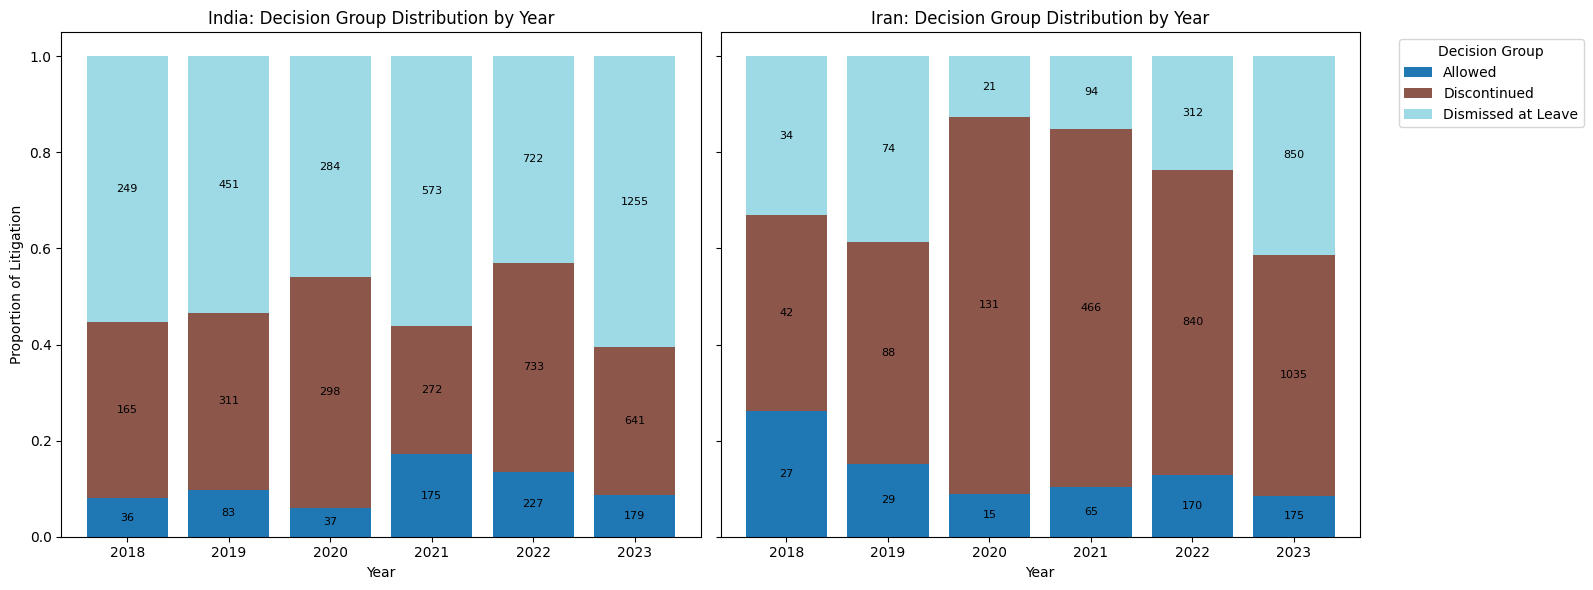

In [125]:
# Step 1: Compute absolute counts
absolute_counts = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
)

# Step 2: Normalize proportions for plotting
proportions = absolute_counts.div(absolute_counts.sum(axis=1), axis=0)

# Step 3: Extract data by country
nr_india_prop = proportions.loc['India'].copy()
nr_iran_prop = proportions.loc["Iran"].copy()
nr_india_abs = absolute_counts.loc['India'].copy()
nr_iran_abs = absolute_counts.loc["Iran"].copy()

# Reset index to just the year
nr_india_prop.index = nr_india_prop.index.get_level_values(0)
nr_iran_prop.index = nr_iran_prop.index.get_level_values(0)
nr_india_abs.index = nr_india_abs.index.get_level_values(0)
nr_iran_abs.index = nr_iran_abs.index.get_level_values(0)

# Step 4: Plot with labels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- India ---
nr_india_prop.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Decision Group Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# Add absolute count labels for India
for idx, year in enumerate(nr_india_abs.index):
    cum_height = 0
    for col in nr_india_abs.columns:
        count = nr_india_abs.loc[year, col]
        if count > 0:
            height = nr_india_prop.loc[year, col]
            axes[0].text(idx, cum_height + height / 2, str(int(count)),
                         ha='center', va='center', fontsize=8, color='black')
            cum_height += height

# --- Iran ---
nr_iran_prop.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('Iran: Decision Group Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Decision Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add absolute count labels for China
for idx, year in enumerate(nr_iran_abs.index):
    cum_height = 0
    for col in nr_iran_abs.columns:
        count = nr_iran_abs.loc[year, col]
        if count > 0:
            height = nr_iran_prop.loc[year, col]
            axes[1].text(idx, cum_height + height / 2, str(int(count)),
                         ha='center', va='center', fontsize=8, color='black')
            cum_height += height

plt.tight_layout()
plt.show()

### Continent Analysis

Preprocessing - group countries into continents

In [91]:
df['Country of Citizenship'].dropna().unique()

array(["People's Republic of China", 'Poland', 'Tunisia',
       'St. Vincent and the Grenadines', 'Pakistan', 'India', 'Colombia',
       'Jamaica', 'Rwanda', 'Chad, Republic of', 'Georgia', 'Philippines',
       'St. Lucia', "Mongolia, People's Republic of", 'Ethiopia',
       'Ukraine', 'Iraq', 'Sri Lanka', 'Hong Kong SAR', 'Syria',
       'Lebanon', 'Namibia', 'Nigeria', 'Republic of South Africa',
       'Antigua and Barbuda', 'United States of America',
       'Democratic Republic of Sudan', 'Saudi Arabia', 'Turkey',
       'Bahrain', 'Guyana', 'Guinea, Republic of',
       'Federal Republic of Germany', 'Mauritania', 'Egypt',
       'Somalia, Democratic Republic of', 'Iran',
       'Socialist Republic of Vietnam', 'Ghana', 'Uzbekistan', 'Mexico',
       'Eritrea', 'Zimbabwe', 'Algeria', 'Bangladesh', 'Stateless',
       'Brazil', 'Yemen, Republic of', 'Guatemala', 'Bosnia-Hercegovina',
       'Senegal', 'Azerbaijan', 'Palestinian Authority (Gaza/West Bank)',
       'Republic of 

In [92]:
# Full country-to-continent mapping using a static dictionary
# These assignments are based on geographic conventions

country_to_region = {
    # Asia
    "People's Republic of China": "Asia", "Pakistan": "Asia", "India": "Asia", "Philippines": "Asia",
    "Mongolia, People's Republic of": "Asia", "Sri Lanka": "Asia", "Hong Kong SAR": "Asia", "Syria": "Asia",
    "Lebanon": "Asia", "Saudi Arabia": "Asia", "Turkey": "Asia", "Bahrain": "Asia", "Iran": "Asia",
    "Socialist Republic of Vietnam": "Asia", "Uzbekistan": "Asia", "Bangladesh": "Asia", "Yemen, Republic of": "Asia",
    "Palestinian Authority (Gaza/West Bank)": "Asia", "Cambodia": "Asia", "Republic of Indonesia": "Asia",
    "Kyrgyzstan": "Asia", "Korea, Republic of": "Asia", "Taiwan": "Asia", "Kazakhstan": "Asia", "Japan": "Asia",
    "Malaysia": "Asia", "Israel": "Asia", "Kuwait": "Asia", "Tadjikistan": "Asia", "Singapore": "Asia",
    "Thailand": "Asia", "Myanmar (Burma)": "Asia", "Nepal": "Asia", "Laos": "Asia", "Qatar": "Asia", "Oman": "Asia",

    # Africa
    "Tunisia": "Africa", "Rwanda": "Africa", "Chad, Republic of": "Africa", "Namibia": "Africa",
    "Nigeria": "Africa", "Republic of South Africa": "Africa", "Democratic Republic of Sudan": "Africa",
    "Guinea, Republic of": "Africa", "Mauritania": "Africa", "Egypt": "Africa",
    "Somalia, Democratic Republic of": "Africa", "Ghana": "Africa", "Eritrea": "Africa", "Zimbabwe": "Africa",
    "Algeria": "Africa", "Senegal": "Africa", "Republic of the Niger": "Africa", "Liberia": "Africa",
    "Kenya": "Africa", "Republic of Djibouti": "Africa", "Libya": "Africa", "Botswana, Republic of": "Africa",
    "Congo, Democratic Republic of the": "Africa", "Togo, Republic of": "Africa", "Morocco": "Africa",
    "Angola": "Africa", "Congo, People's Republic of the": "Africa", "Federal Republic of Cameroon": "Africa",
    "Uganda": "Africa", "Burundi": "Africa", "Sierra Leone": "Africa", "Peoples Republic of Benin": "Africa",
    "Mali, Republic of": "Africa", "Republic of Ivory Coast": "Africa", "Burkina-Faso": "Africa",
    "South Sudan, Republic Of": "Africa", "Central African Republic": "Africa", "Equatorial Guinea": "Africa",
    "Gabon Republic": "Africa", "Zambia": "Africa", "Malawi": "Africa", "Mozambique": "Africa", "Comoros": "Africa",
    "Madagascar": "Africa", "Lesotho": "Africa",

    # Europe
    "Poland": "Europe", "Georgia": "Europe", "Ukraine": "Europe", "Federal Republic of Germany": "Europe",
    "Bosnia-Hercegovina": "Europe", "Romania": "Europe", "Hungary": "Europe", "Norway": "Europe", "Albania": "Europe",
    "Czech Republic": "Europe", "Italy": "Europe", "Moldova": "Europe", "Belgium": "Europe", "Macedonia": "Europe",
    "France": "Europe", "Russia": "Europe", "Austria": "Europe", "United Kingdom and Overseas Territories": "Europe",
    "Portugal": "Europe", "Slovak Republic": "Europe", "Republic of Ireland": "Europe",
    "Korea, People's Democratic Republic of": "Asia",  # NK in Asia
    "Croatia": "Europe", "Montenegro, Republic of": "Europe", "Cyprus": "Europe", "The Netherlands": "Europe",
    "Swaziland": "Africa",  # eSwatini
    "Greece": "Europe", "Lithuania": "Europe", "Switzerland": "Europe", "Sweden": "Europe", "Bulgaria": "Europe",
    "Latvia": "Europe", "Finland": "Europe", "Serbia and Montenegro": "Europe", "Slovenia": "Europe",
    "Luxembourg": "Europe", "Denmark": "Europe", "Estonia": "Europe", "Iceland": "Europe",

    # North America
    "St. Vincent and the Grenadines": "North America", "Colombia": "South America", "Jamaica": "North America",
    "Antigua and Barbuda": "North America", "United States of America": "North America", "Guyana": "South America",
    "Mexico": "North America", "Guatemala": "North America", "Haiti": "North America", "El Salvador": "North America",
    "Cuba": "North America", "Costa Rica": "North America", "Dominican Republic": "North America",
    "Barbados": "North America", "Bahama Islands, The": "North America", "Trinidad and Tobago, Republic of": "North America",
    "St. Kitts-Nevis": "North America", "Grenada": "North America", "Belize": "North America", "Dominica": "North America",

    # South America
    "Brazil": "South America", "Venezuela": "South America", "Ecuador": "South America", "Uruguay": "South America",
    "Peru": "South America", "Argentina": "South America", "Paraguay": "South America", "Bolivia": "South America",
    "Panama, Republic of": "North America",  # geographically Central America

    # Oceania
    "Australia": "Oceania", "New Zealand": "Oceania", "Fiji": "Oceania", "Solomons, The": "Oceania",
    "Vanuatu": "Oceania",

    # Unknown
    "Stateless": "Unknown", "Unspecified": "Unknown", "Kosovo, Republic of": "Europe", "Surinam": "South America",
    "Republic of Tanzania": "Africa", "Mauritius": "Africa", "Serbia, Republic of": "Europe", "Bhutan": "Asia",
    "Macao SAR": "Asia", "Republic of Korea": "Asia", "Taiwan": "Asia",
}

# Display total number of countries mapped
len(country_to_region)

165

Percentage for Allowed, Dismissed, and Discontinued

In [93]:
# Assign regions
df['Region'] = df['Country of Citizenship'].map(country_to_region)

# Clean decision categories
decision_groups = {
    'Allowed': 'Allowed',
    'Allowed - Consent': 'Allowed',
    'Discontinued - Withdrawn at Leave': 'Discontinued',
    'Discontinued - Consent at Leave': 'Discontinued',
    'Dismissed at Leave': 'Dismissed at Leave'
}
df['Decision Group'] = df['LIT Leave Decision Desc'].map(decision_groups)

# Filter for relevant rows
df_region = df[df['Decision Group'].isin(['Allowed', 'Discontinued', 'Dismissed at Leave'])].copy()

# Group by region and decision group
region_summary = (
    df_region
    .groupby(['Region', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
)

# Calculate totals and percentages
region_summary['Total'] = region_summary.sum(axis=1)
region_summary['% Allowed'] = (region_summary['Allowed'] / region_summary['Total'] * 100).round(1)
region_summary['% Dismissed'] = (region_summary['Dismissed at Leave'] / region_summary['Total'] * 100).round(1)
region_summary['% Discontinued'] = (region_summary['Discontinued'] / region_summary['Total'] * 100).round(1)

region_summary

Decision Group,Allowed,Discontinued,Dismissed at Leave,Total,% Allowed,% Dismissed,% Discontinued
Region,,,,,,,
Africa,2628,2962,7308,12898,20.4,56.7,23.0
Asia,3470,8114,9824,21408,16.2,45.9,37.9
Europe,797,744,1352,2893,27.5,46.7,25.7
North America,1299,974,4016,6289,20.7,63.9,15.5
Oceania,8,23,17,48,16.7,35.4,47.9
South America,694,524,1185,2403,28.9,49.3,21.8
Unknown,93,78,115,286,32.5,40.2,27.3


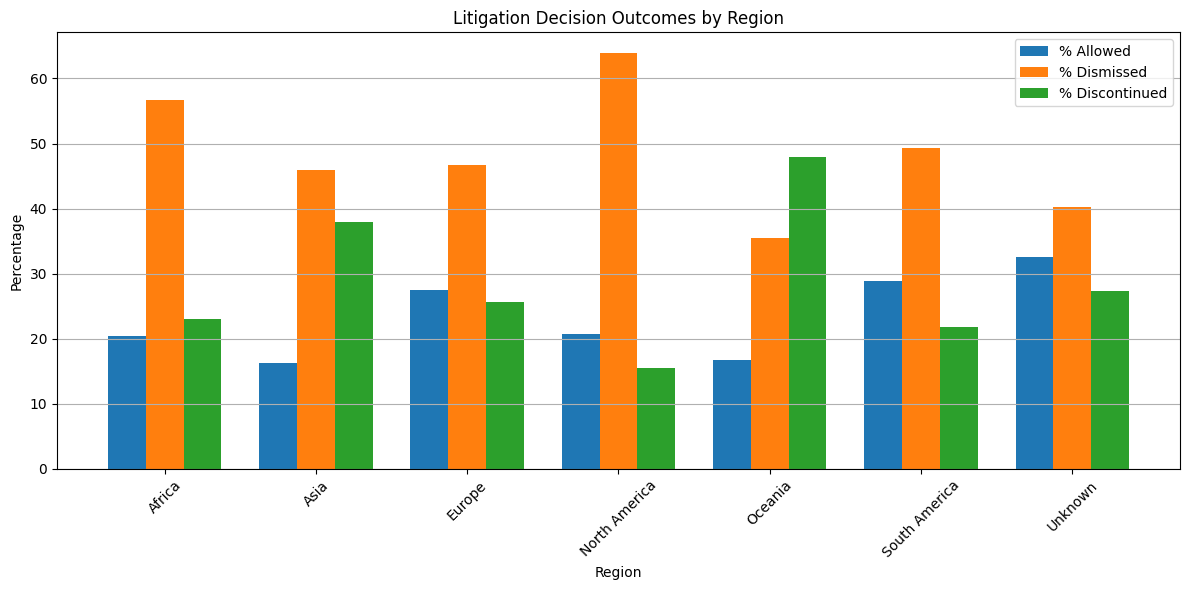

In [94]:
import matplotlib.pyplot as plt

# Prepare plotting variables
regions = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Unknown']
bar_width = 0.25
x = range(len(regions))

# Manually define percentage values from your summary
pct_allowed = [20.4, 16.2, 27.5, 20.7, 16.7, 28.9, 32.5]
pct_dismissed = [56.7, 45.9, 46.7, 63.9, 35.4, 49.3, 40.2]
pct_discontinued = [23.0, 37.9, 25.7, 15.5, 47.9, 21.8, 27.3]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, pct_allowed, width=bar_width, label='% Allowed')
plt.bar([i + bar_width for i in x], pct_dismissed, width=bar_width, label='% Dismissed')
plt.bar([i + 2 * bar_width for i in x], pct_discontinued, width=bar_width, label='% Discontinued')

# Format plot
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Litigation Decision Outcomes by Region')
plt.xticks([i + bar_width for i in x], regions, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.show()

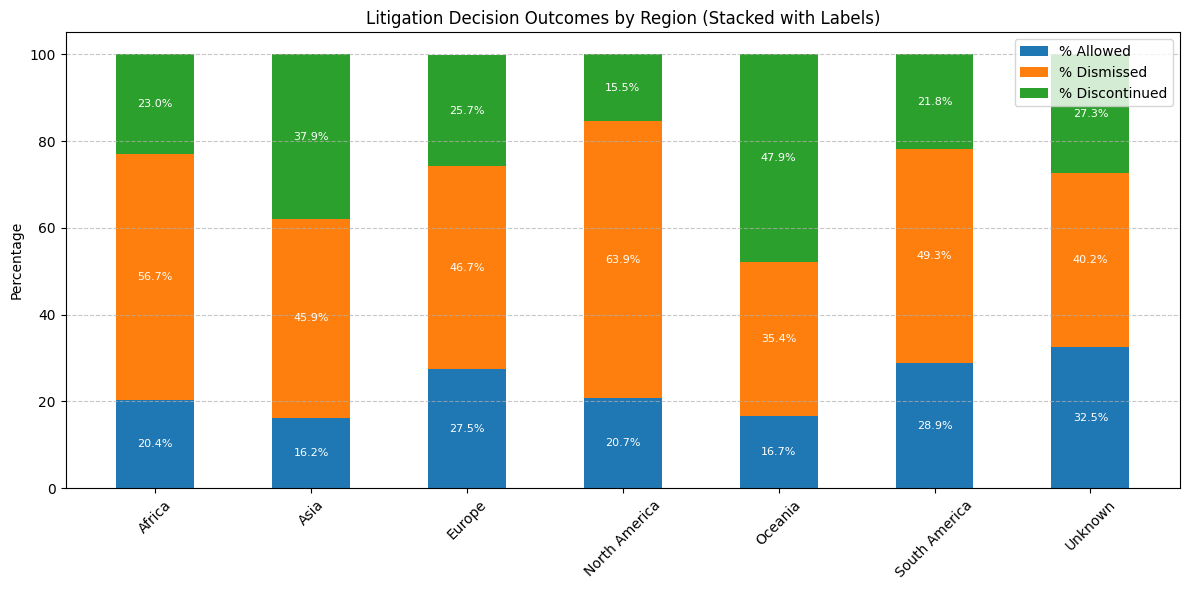

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Data
regions = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Unknown']
pct_allowed = [20.4, 16.2, 27.5, 20.7, 16.7, 28.9, 32.5]
pct_dismissed = [56.7, 45.9, 46.7, 63.9, 35.4, 49.3, 40.2]
pct_discontinued = [23.0, 37.9, 25.7, 15.5, 47.9, 21.8, 27.3]

# Stack positions
x = np.arange(len(regions))
bar_width = 0.5

# Plot
plt.figure(figsize=(12, 6))
p1 = plt.bar(x, pct_allowed, width=bar_width, label='% Allowed')
p2 = plt.bar(x, pct_dismissed, bottom=pct_allowed, width=bar_width, label='% Dismissed')
bottom2 = np.array(pct_allowed) + np.array(pct_dismissed)
p3 = plt.bar(x, pct_discontinued, bottom=bottom2, width=bar_width, label='% Discontinued')

# Add labels
for bars, heights in zip([p1, p2, p3], [pct_allowed, pct_dismissed, pct_discontinued]):
    for bar, height in zip(bars, heights):
        y = bar.get_y() + bar.get_height() / 2
        plt.text(bar.get_x() + bar.get_width()/2, y, f'{height}%', ha='center', va='center', fontsize=8, color='white')

plt.xticks(x, regions, rotation=45)
plt.ylabel('Percentage')
plt.title('Litigation Decision Outcomes by Region (Stacked with Labels)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


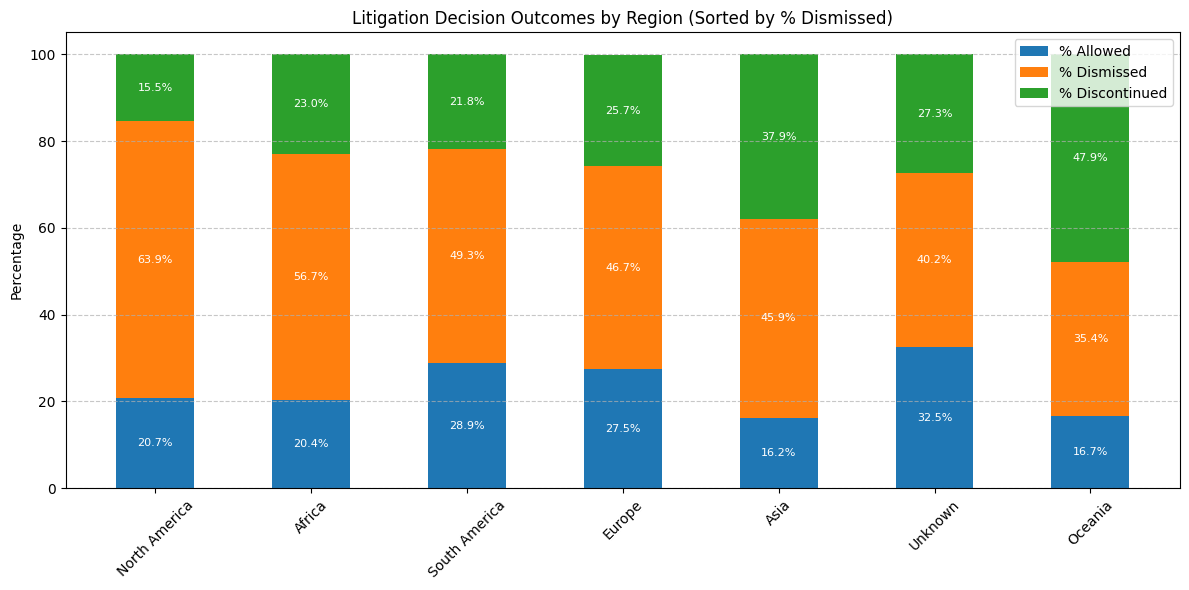

In [96]:
# sort by percentage dismissed, high to low

import matplotlib.pyplot as plt
import numpy as np

# Original data
regions = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Unknown']
pct_allowed = [20.4, 16.2, 27.5, 20.7, 16.7, 28.9, 32.5]
pct_dismissed = [56.7, 45.9, 46.7, 63.9, 35.4, 49.3, 40.2]
pct_discontinued = [23.0, 37.9, 25.7, 15.5, 47.9, 21.8, 27.3]

# Combine and sort by % Dismissed
data = list(zip(regions, pct_allowed, pct_dismissed, pct_discontinued))
data_sorted = sorted(data, key=lambda x: x[2], reverse=True)

# Unpack sorted data
regions_sorted, pct_allowed_sorted, pct_dismissed_sorted, pct_discontinued_sorted = zip(*data_sorted)

# X positions
x = np.arange(len(regions_sorted))
bar_width = 0.5

# Plot
plt.figure(figsize=(12, 6))
p1 = plt.bar(x, pct_allowed_sorted, width=bar_width, label='% Allowed')
p2 = plt.bar(x, pct_dismissed_sorted, bottom=pct_allowed_sorted, width=bar_width, label='% Dismissed')
bottom2 = np.array(pct_allowed_sorted) + np.array(pct_dismissed_sorted)
p3 = plt.bar(x, pct_discontinued_sorted, bottom=bottom2, width=bar_width, label='% Discontinued')

# Add labels
for bars, heights in zip([p1, p2, p3], [pct_allowed_sorted, pct_dismissed_sorted, pct_discontinued_sorted]):
    for bar, height in zip(bars, heights):
        y = bar.get_y() + bar.get_height() / 2
        plt.text(bar.get_x() + bar.get_width()/2, y, f'{height}%', ha='center', va='center', fontsize=8, color='white')

plt.xticks(x, regions_sorted, rotation=45)
plt.ylabel('Percentage')
plt.title('Litigation Decision Outcomes by Region (Sorted by % Dismissed)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
# recap, absolute numbers
region_summary

Decision Group,Allowed,Discontinued,Dismissed at Leave,Total,% Allowed,% Dismissed,% Discontinued
Region,,,,,,,
Africa,2628,2962,7308,12898,20.4,56.7,23.0
Asia,3470,8114,9824,21408,16.2,45.9,37.9
Europe,797,744,1352,2893,27.5,46.7,25.7
North America,1299,974,4016,6289,20.7,63.9,15.5
Oceania,8,23,17,48,16.7,35.4,47.9
South America,694,524,1185,2403,28.9,49.3,21.8
Unknown,93,78,115,286,32.5,40.2,27.3


In [98]:
# To-do: look into North America later

##### Key Differences for Africa:
Higher % of Dismissed at Leave (56.7%): 
- This is the highest among all regions, suggesting that cases from African countries are more likely to be rejected at the leave stage.
- This may reflect systemic issues such as procedural barriers or stronger scrutiny.

Lower % of Allowed (20.4%):
- While not the lowest (Asia is lower at 16.2%), it is still below Europe (27.5%) and South America (28.9%), indicating fewer successful leave applications.

Moderate % of Discontinued (23.0%):
- This is relatively balanced, but lower than Oceania and Asia, where discontinuation (withdrawal or consent) is more common.

##### Interpretation:
Dismissal-dominant profile:
- Africa’s outcomes suggest a litigation pattern where a majority of cases are dismissed early, potentially before full hearing or consideration.

Lower allowance rate may indicate either:
- Weaker supporting evidence in applications.
- More aggressive government litigation against African claimants.
- Procedural or systemic disadvantage in how cases from African nationals are handled.



### Filed By Summary by Region

In [99]:
# Compare share of cases filed by “Minister” vs. “Person Concerned” across regions
filed_by_summary = (
    df[df['LIT Filed By Desc'].notna()]
    .groupby(['Region', 'LIT Filed By Desc'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
)

# Calculate total and percentages
filed_by_summary['Total'] = filed_by_summary.sum(axis=1)
for col in filed_by_summary.columns[:-1]:
    filed_by_summary[f'% {col}'] = (filed_by_summary[col] / filed_by_summary['Total'] * 100).round(1)

# Display in your notebook
display(filed_by_summary)

LIT Filed By Desc,Minister - CBSA,Minister - CIC,Person Concerned,Third Party,Total,% Minister - CBSA,% Minister - CIC,% Person Concerned,% Third Party
Region,,,,,,,,,
Africa,25,77,12671,139,12912,0.2,0.6,98.1,1.1
Asia,21,112,20915,385,21433,0.1,0.5,97.6,1.8
Europe,4,5,2842,42,2893,0.1,0.2,98.2,1.5
North America,5,9,6238,43,6295,0.1,0.1,99.1,0.7
Oceania,1,0,43,4,48,2.1,0.0,89.6,8.3
South America,3,4,2382,16,2405,0.1,0.2,99.0,0.7
Unknown,1,1,282,2,286,0.3,0.3,98.6,0.7


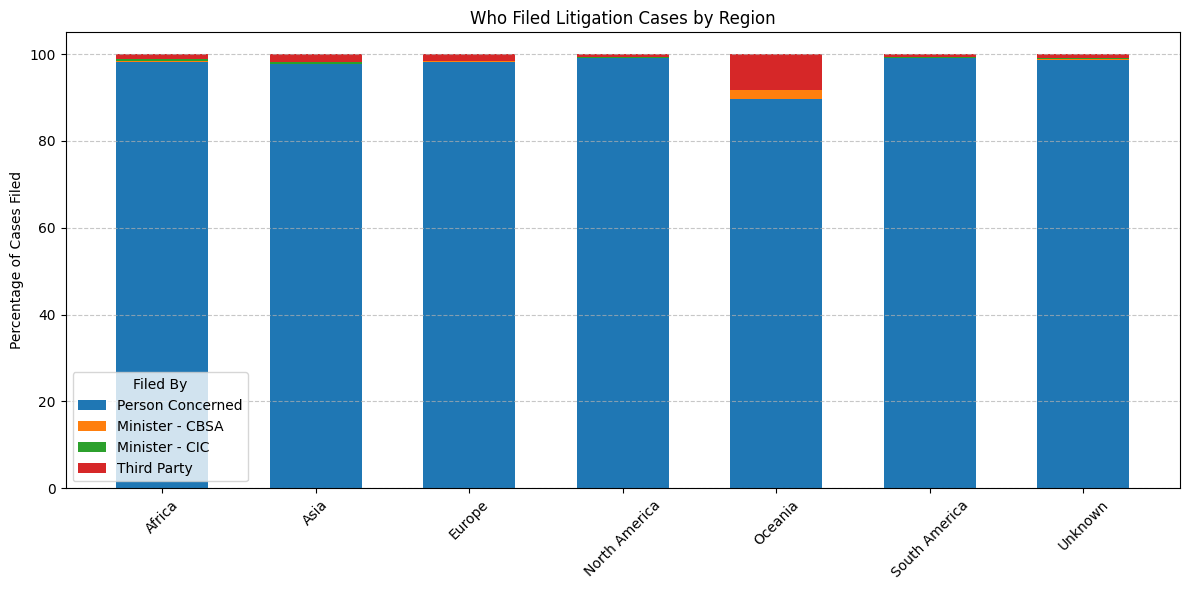

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for visualization
regions = filed_by_summary.index.tolist()
x = np.arange(len(regions))
bar_width = 0.6

# Extract percentage columns
pct_person = filed_by_summary['% Person Concerned']
pct_min_cbsa = filed_by_summary['% Minister - CBSA']
pct_min_cic = filed_by_summary['% Minister - CIC']
pct_third = filed_by_summary['% Third Party']

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, pct_person, label='Person Concerned', width=bar_width)
plt.bar(x, pct_min_cbsa, bottom=pct_person, label='Minister - CBSA', width=bar_width)
plt.bar(x, pct_min_cic, bottom=pct_person + pct_min_cbsa, label='Minister - CIC', width=bar_width)
plt.bar(x, pct_third, bottom=pct_person + pct_min_cbsa + pct_min_cic, label='Third Party', width=bar_width)

# Customize plot
plt.xticks(x, regions, rotation=45)
plt.ylabel('Percentage of Cases Filed')
plt.title('Who Filed Litigation Cases by Region')
plt.legend(title='Filed By')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Tribunal Type Summary by Region

In [101]:
# Compare tribunal type distributions by region
tribunal_summary = (
    df[df['LIT Tribunal Type Desc'].notna()]
    .groupby(['Region', 'LIT Tribunal Type Desc'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
)

# Calculate totals and percentages
tribunal_summary['Total'] = tribunal_summary.sum(axis=1)
for col in tribunal_summary.columns[:-1]:
    tribunal_summary[f'% {col}'] = (tribunal_summary[col] / tribunal_summary['Total'] * 100).round(1)

# Extract only percentage columns
tribunal_summary_percent = tribunal_summary[[col for col in tribunal_summary.columns if col.startswith('% ')]]

# Display result
display(tribunal_summary_percent)

LIT Tribunal Type Desc,% Federal Court,% Federal Court of Appeal,% Supreme Court of Canada,% UNHRC
Region,,,,
Africa,99.8,0.2,0.0,0.0
Asia,99.7,0.3,0.0,0.0
Europe,99.8,0.2,0.0,0.0
North America,99.9,0.1,0.0,0.0
Oceania,100.0,0.0,0.0,0.0
South America,99.9,0.1,0.0,0.0
Unknown,100.0,0.0,0.0,0.0


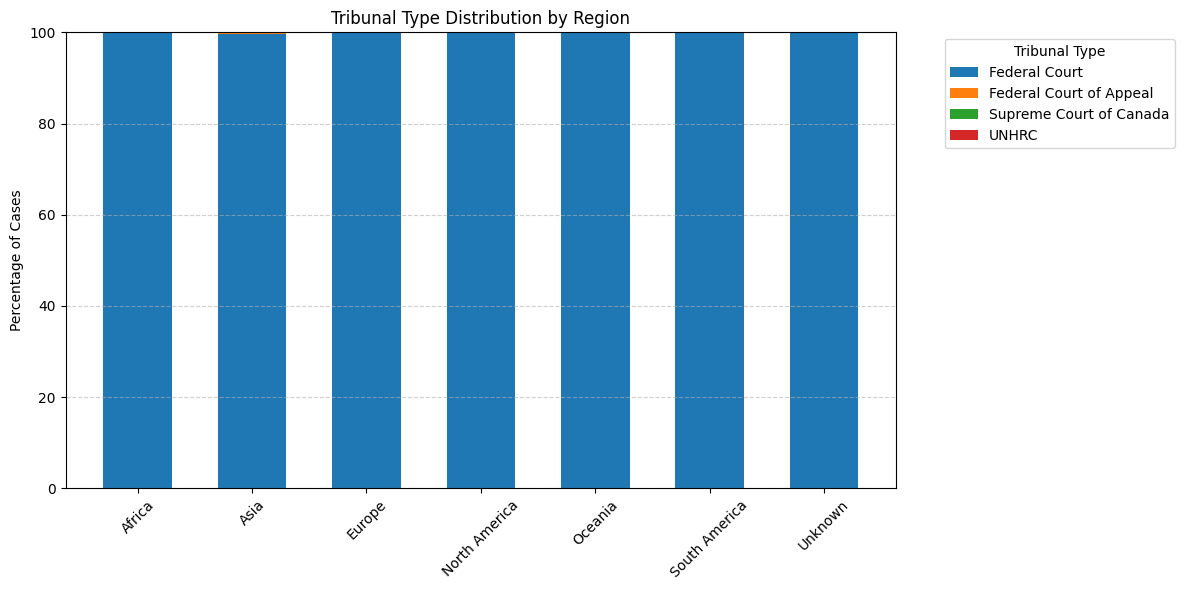

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
regions = tribunal_summary_percent.index.tolist()
x = np.arange(len(regions))
bar_width = 0.6

# Extract the tribunal types and their percentage values
tribunal_types = tribunal_summary_percent.columns
bottom = np.zeros(len(regions))

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each tribunal type as a stacked segment
for col in tribunal_types:
    values = tribunal_summary_percent[col].values
    plt.bar(x, values, bottom=bottom, label=col.replace('% ', ''), width=bar_width)
    bottom += values

# Customize the plot
plt.xticks(x, regions, rotation=45)
plt.ylabel('Percentage of Cases')
plt.title('Tribunal Type Distribution by Region')
plt.legend(title='Tribunal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Didn't see anything particularly interesting for Filed By and Tribunal types. 

### Case Type Summary by Region

In [103]:
# Compare case type composition across regions
case_type_summary = (
    df[df['LIT Case Type Group Desc'].notna()]
    .groupby(['Region', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
)

# Calculate totals and percentages
case_type_summary['Total'] = case_type_summary.sum(axis=1)
for col in case_type_summary.columns[:-1]:
    case_type_summary[f'% {col}'] = (case_type_summary[col] / case_type_summary['Total'] * 100).round(1)

# Extract only percentage columns for visualization
case_type_summary_percent = case_type_summary[[col for col in case_type_summary.columns if col.startswith('% ')]]

# Display result
display(case_type_summary_percent)


LIT Case Type Group Desc,% Citizenship Program,% DFN,% Danger Opinions,% Detention,% HC Decisions,% IAD Decisions,% ID Decisions,% In-Canada Classes,% Mandamus,% Other,% PRRA,% RAD Decisions,% RPD Decisions,% Refugee Eligibility,% Removal Arrangements,% Removal Order,% Visa Officer Refusal
Region,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.1,5.0,1.0,0.4,0.0,2.0,0.2,6.4,49.3,7.3,0.1,4.1,4.5,19.7
Asia,0.0,0.0,0.0,0.0,4.1,1.4,0.3,0.2,6.4,0.2,4.0,23.2,6.3,0.1,1.7,7.1,44.8
Europe,0.1,0.0,0.0,0.1,9.2,1.3,0.9,0.0,4.9,0.1,8.6,20.4,19.1,0.2,5.6,11.0,18.4
North America,0.0,0.0,0.0,0.1,7.1,0.9,0.5,0.0,1.9,0.1,6.5,53.9,13.2,0.1,4.3,5.7,5.8
Oceania,0.0,0.0,0.0,0.0,14.6,8.3,0.0,0.0,2.1,2.1,0.0,6.2,4.2,0.0,0.0,27.1,35.4
South America,0.0,0.0,0.0,0.0,5.2,0.5,0.4,0.0,2.1,0.0,4.8,36.5,31.6,0.0,4.9,4.6,9.2
Unknown,1.0,0.0,0.0,0.0,4.5,0.3,0.3,0.0,3.5,2.1,3.5,29.7,38.1,0.3,0.0,8.0,8.4


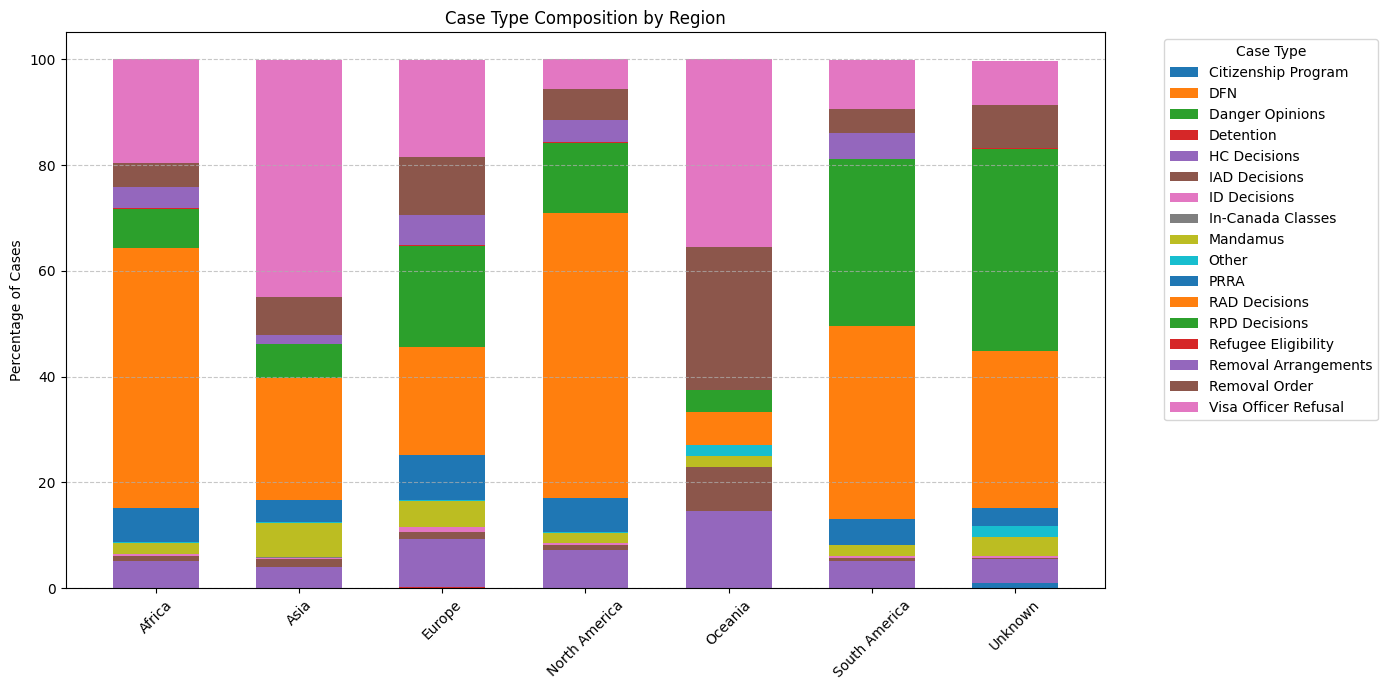

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
regions = case_type_summary_percent.index.tolist()
x = np.arange(len(regions))
bar_width = 0.6

# Tribunal types (as cleaned column names)
case_types = case_type_summary_percent.columns
bottom = np.zeros(len(regions))

# Set up the plot
plt.figure(figsize=(14, 7))

# Plot each case type
for col in case_types:
    values = case_type_summary_percent[col].values
    label = col.replace('% ', '')
    plt.bar(x, values, bottom=bottom, label=label, width=bar_width)
    bottom += values

# Customize plot
plt.xticks(x, regions, rotation=45)
plt.ylabel('Percentage of Cases')
plt.title('Case Type Composition by Region')
plt.legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [105]:
# For final pre: use different charts for motivation - why Africa is particularly interesing? 

##### Africa: Case Type Composition Highlights

1. High proportion of RAD Decisions (Refugee Appeal Division) — ~49%

- This is substantially higher than most other regions.

- Indicates that a large portion of African litigation is tied to refugee claims and appeals, reflecting reliance on asylum processes.

- Potential implication: African claimants may face more initial rejections, requiring appeal to RAD.

2. Noticeable use of PRRA and Removal Orders

- PRRA (Pre-Removal Risk Assessment): 6.4%

- Removal Order: 4.5%

- Removal Arrangements: 4.1%

- Together, ~15% of African cases are tied to removal and deportation mechanisms.

- This suggests more adversarial or enforcement-driven litigation, possibly tied to denied refugee or visa claims.

3. Lower share of Mandamus (~2%) and Visa Officer Refusal (20%)

- Visa Officer Refusal is lower than Asia (where it exceeds 40%) but still significant.

- Mandamus, a legal remedy to push decisions, is much lower than in Asia or Europe.

- This may imply less frequent procedural litigation or fewer formal legal tools used by African claimants.

4. Low diversity of case types

- Africa’s litigation is concentrated in a few categories: RAD Decisions, Discretionary Relief, and Enforcement.

- Regions like Asia and Europe have a more diverse spread including Mandamus, HC Decisions, IAD, and Citizenship Program cases.

- This could indicate limited access to broader immigration legal channels for African applicants.



##### Implication on Systemic Disparities

- The high concentration of refugee appeals and removal actions suggests that African nationals are disproportionately funneled through high-risk, high-stakes legal pathways, often after an initial denial.

- Lower usage of Mandamus and other procedural remedies may signal barriers to legal representation, knowledge, or access.

- These patterns support a hypothesis of structural inequality in how African applicants interact with the litigation system — likely exacerbated by resource constraints, political narratives, or administrative screening.

##### Decision Type Breakdown by Case Type and Region

In [106]:
# Use all rows where 'LIT Case Type Group Desc' is available
df_dec_all = df[df['LIT Case Type Group Desc'].notna()].copy()

# Recalculate groupings with all decision groups
grouped_all = (
    df_dec_all.groupby(['Region', 'LIT Case Type Group Desc', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Pivot to wider format
pivot_all = grouped_all.pivot_table(index=['Region', 'LIT Case Type Group Desc'],
                                    columns='Decision Group',
                                    values='LIT Litigation Count',
                                    fill_value=0)

# Add total and percentages for all columns
pivot_all['Total'] = pivot_all.sum(axis=1)
for col in pivot_all.columns:
    if col not in ['Total']:
        pivot_all[f'% {col}'] = (pivot_all[col] / pivot_all['Total'] * 100).round(1)

# Reset index for display
pivot_all.reset_index(inplace=True)
# Display table
display(pivot)

Decision Group                                                                                                        Allowed  \
Country of Citizenship     LIT Leave Decision Date - Year Country of Citizenship     LIT Leave Decision Date - Year             
India                      2018                           India                      2018                            0.088235   
                           2019                           India                      2019                            0.111111   
                           2020                           India                      2020                            0.033040   
                           2021                           India                      2021                            0.189565   
                           2022                           India                      2022                            0.104506   
                           2023                           India                      2023                            0.056838   
Nigeria                    2018                           Nigeria                    2018                            0.228814   
                           2019                           Nigeria                    2019                            0.103723   
                           2020                           Nigeria                    2020                            0.035831   
                           2021                           Nigeria                    2021                            0.200466   
                           2022                           Nigeria                    2022                            0.133721   
                           2023                           Nigeria                    2023                            0.104513   
People's Republic of China 2018                           People's Republic of China 2018                            0.181159   
                           2019                           People's Republic of China 2019                            0.189944   
                           2020                           People's Republic of China 2020                            0.093023   
                           2021                           People's Republic of China 2021                            0.303483   
                           2022                           People's Republic of China 2022                            0.120172   
                           2023                           People's Republic of China 2023                            0.052045   

Decision Group                                                                                                       Discontinued  \
Country of Citizenship     LIT Leave Decision Date - Year Country of Citizenship     LIT Leave Decision Date - Year                 
India                      2018                           India                      2018                                0.446524   
                           2019                           India                      2019                                0.470320   
                           2020                           India                      2020                                0.623348   
                           2021                           India                      2021                                0.450435   
                           2022                           India                      2022                                0.655801   
                           2023                           India                      2023                                0.526643   
Nigeria                    2018                           Nigeria                    2018                                0.161017   
                           2019                           Nigeria                    2019                                0.380319   
                           2020                           Nigeria                    2020

In [107]:
df.columns.tolist()

['Country of Citizenship',
 'LIT Leave Decision Desc',
 'LIT Case Type Group Desc',
 'LIT Case Type Desc',
 'LIT Filed By Desc',
 'LIT Tribunal Type Desc',
 'LIT Primary Office Type Desc',
 'LIT Primary Office Regional Group Desc',
 'LIT Litigation Count',
 'Decision Group',
 'Region']

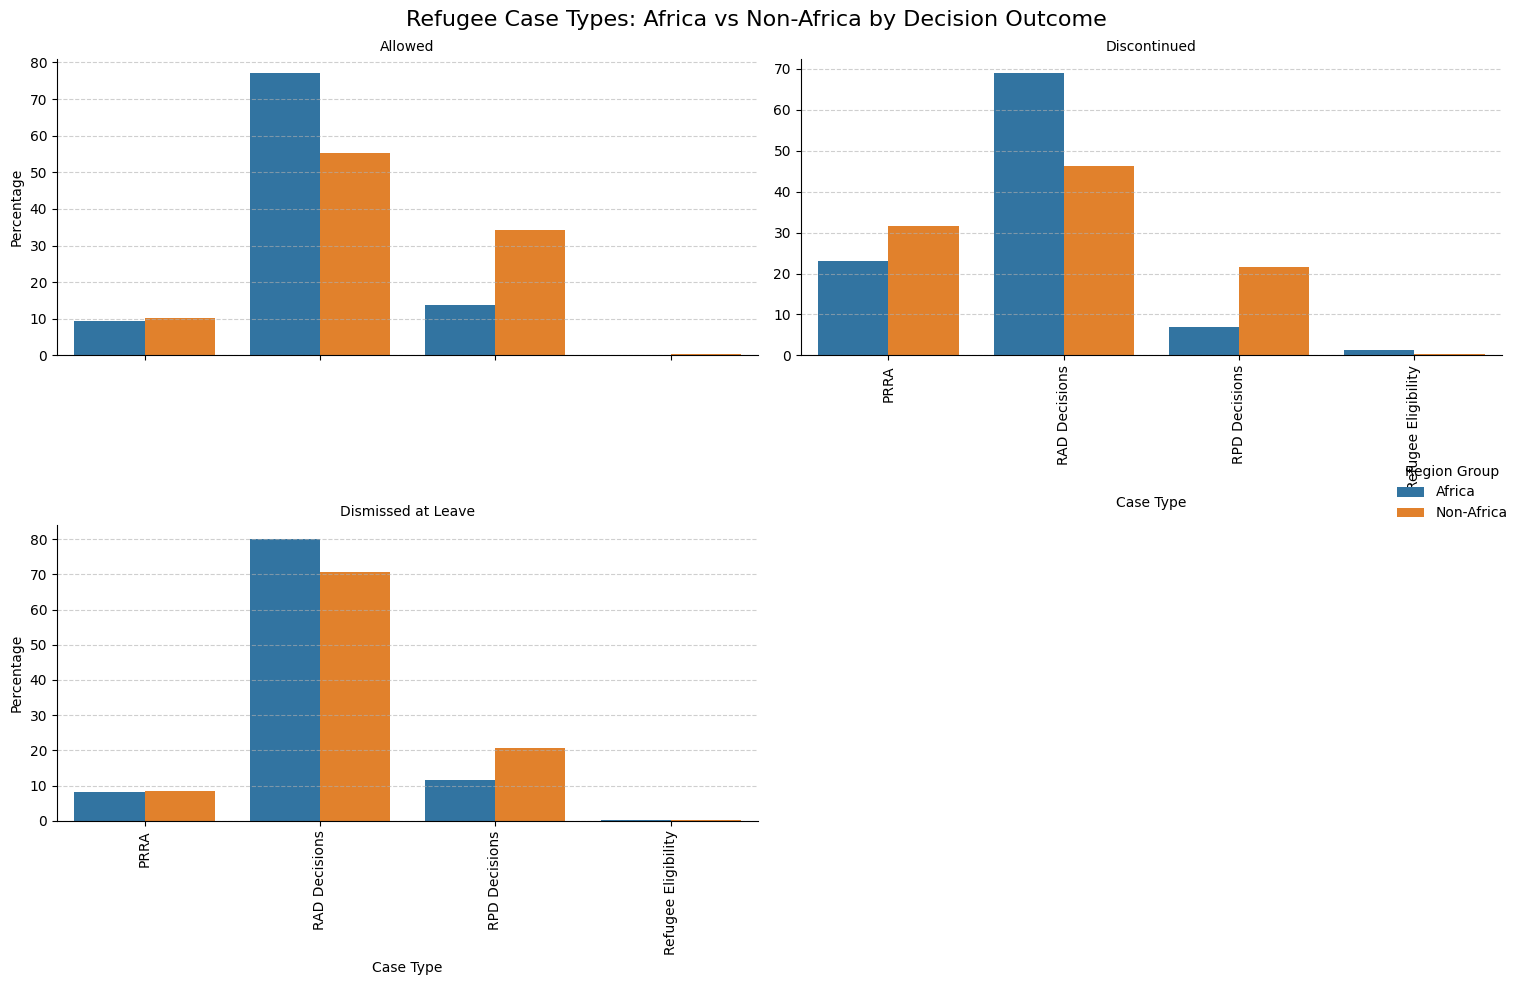

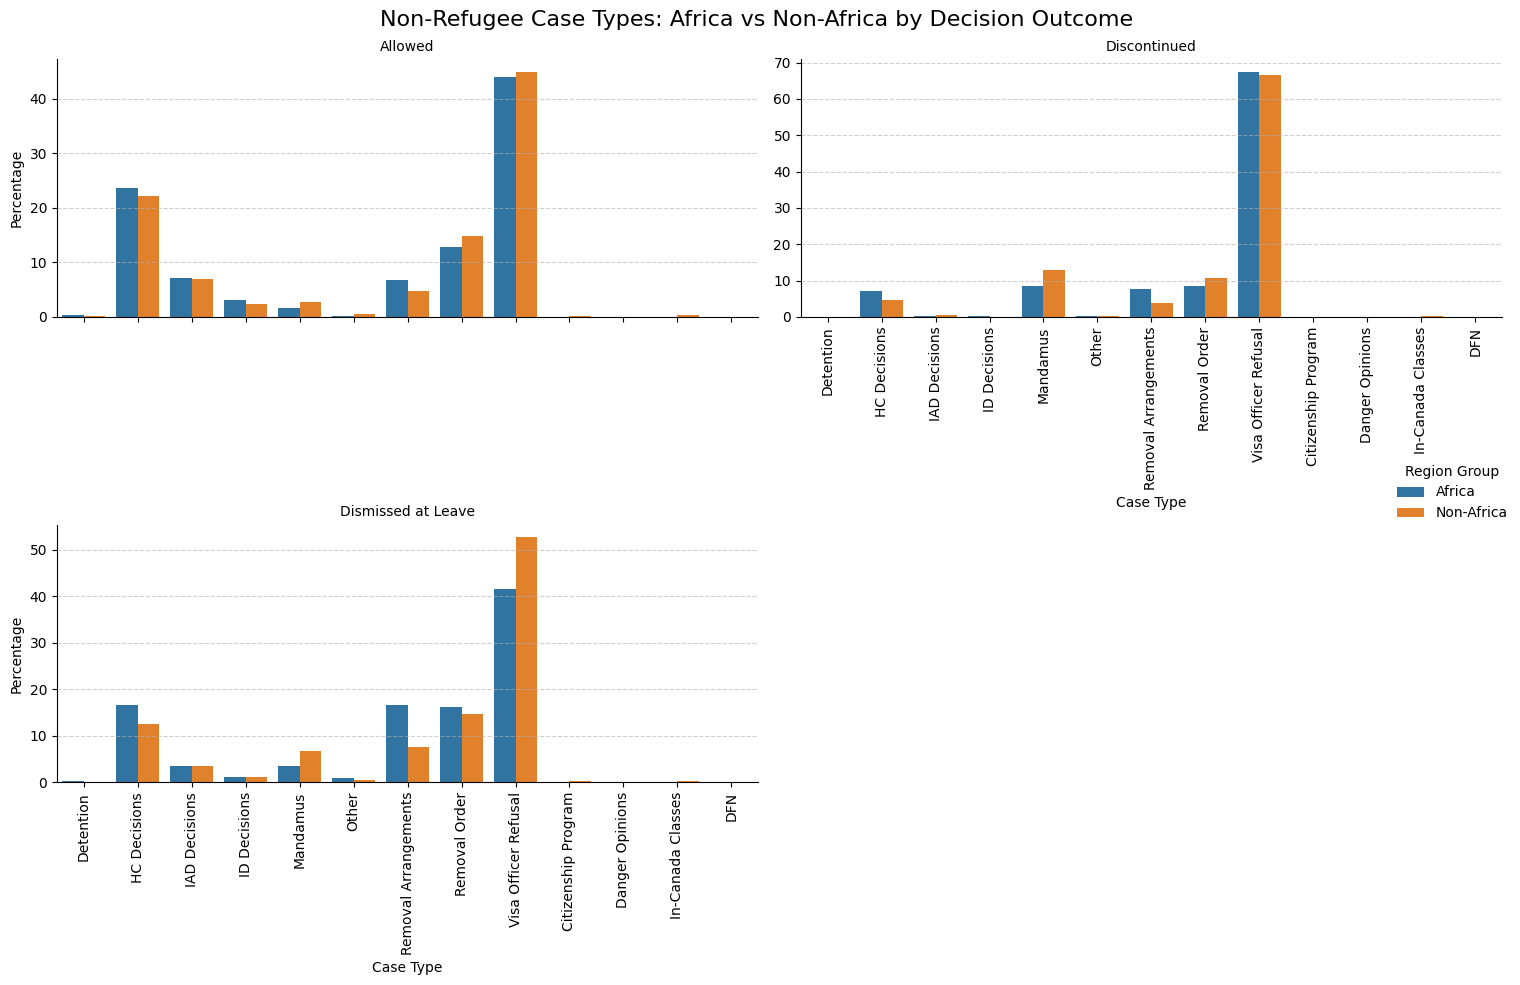

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define refugee case types
refugee_case_types = ['RPD Decisions', 'RAD Decisions', 'PRRA', 'Refugee Eligibility']

# Add 'Case Group' column: Refugee or Non-Refugee
df['Case Group'] = df['LIT Case Type Group Desc'].apply(lambda x: 'Refugee' if x in refugee_case_types else 'Non-Refugee')

# Use cleaned column names for region grouping
df['Region Group'] = df['Region'].apply(lambda x: 'Africa' if x == 'Africa' else 'Non-Africa')

def plot_case_outcomes(data, title):
    # Group by Region, Decision, and Case Type
    grouped = (
        data.groupby(['Region Group', 'Decision Group', 'LIT Case Type Group Desc'])['LIT Litigation Count']
        .sum()
        .reset_index()
    )
    
    # Calculate percentages within each Decision × Region group
    grouped['Percentage'] = grouped.groupby(['Region Group', 'Decision Group'])['LIT Litigation Count'].transform(
        lambda x: (x / x.sum()) * 100
    ).round(1)

    # Plot setup
    g = sns.catplot(
        data=grouped,
        x='LIT Case Type Group Desc',
        y='Percentage',
        hue='Region Group',
        col='Decision Group',
        kind='bar',
        col_wrap=2,
        height=5,
        aspect=1.4,
        sharey=False
    )

    for ax in g.axes.flat:
        for bar in ax.patches:
            bar.set_linewidth(0)
            bar.set_edgecolor(bar.get_facecolor())
        ax.set_xlabel("Case Type")
        ax.tick_params(axis='x', rotation=90)
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    g.set_titles("{col_name}")
    g.set_axis_labels("Case Type", "Percentage")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Filter refugee and non-refugee
refugee_df = df[df['Case Group'] == 'Refugee']
non_refugee_df = df[df['Case Group'] == 'Non-Refugee']

# Plot graphs
plot_case_outcomes(refugee_df, "Refugee Case Types: Africa vs Non-Africa by Decision Outcome")
plot_case_outcomes(non_refugee_df, "Non-Refugee Case Types: Africa vs Non-Africa by Decision Outcome")

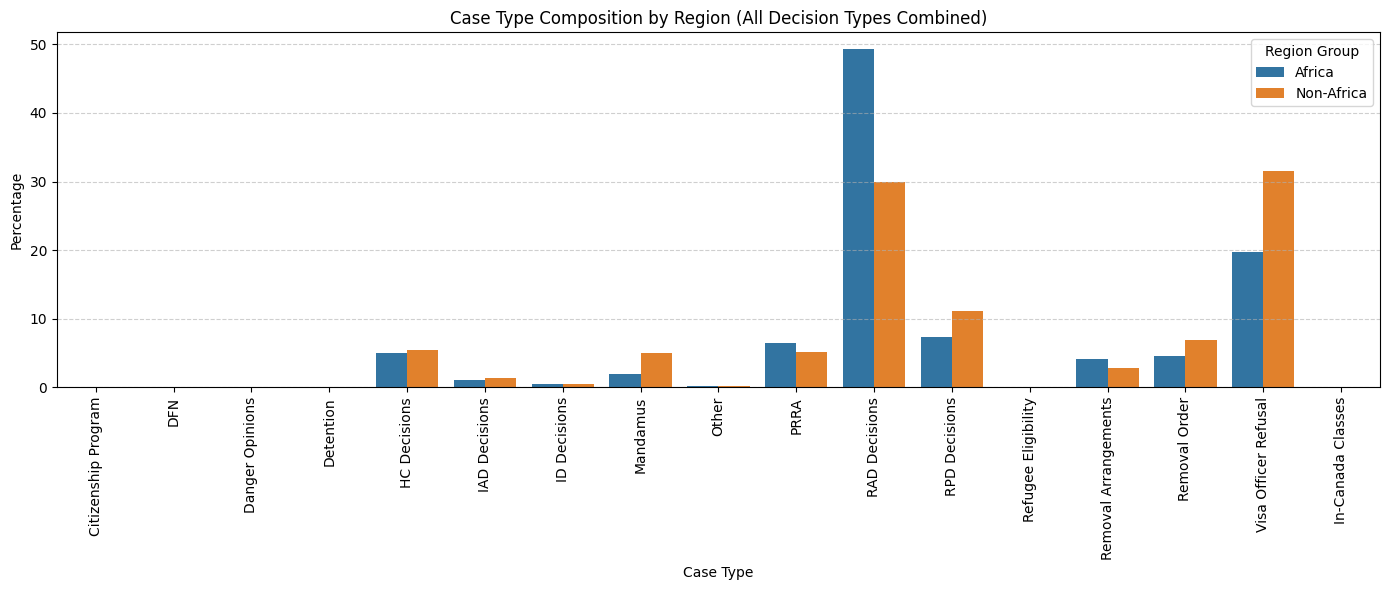

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define refugee case types
refugee_case_types = ['RPD Decisions', 'RAD Decisions', 'PRRA', 'Refugee Eligibility']

# Classify as Refugee or Non-Refugee
df['Case Group'] = df['LIT Case Type Group Desc'].apply(lambda x: 'Refugee' if x in refugee_case_types else 'Non-Refugee')
df['Region Group'] = df['Region'].apply(lambda x: 'Africa' if x == 'Africa' else 'Non-Africa')

# Group by region and case type, summing all decisions
grouped = (
    df.groupby(['Region Group', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Normalize to percentage per region
grouped['Percentage'] = grouped.groupby('Region Group')['LIT Litigation Count'].transform(
    lambda x: (x / x.sum()) * 100
).round(1)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped,
    x='LIT Case Type Group Desc',
    y='Percentage',
    hue='Region Group'
)
plt.title('Case Type Composition by Region (All Decision Types Combined)')
plt.xlabel('Case Type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


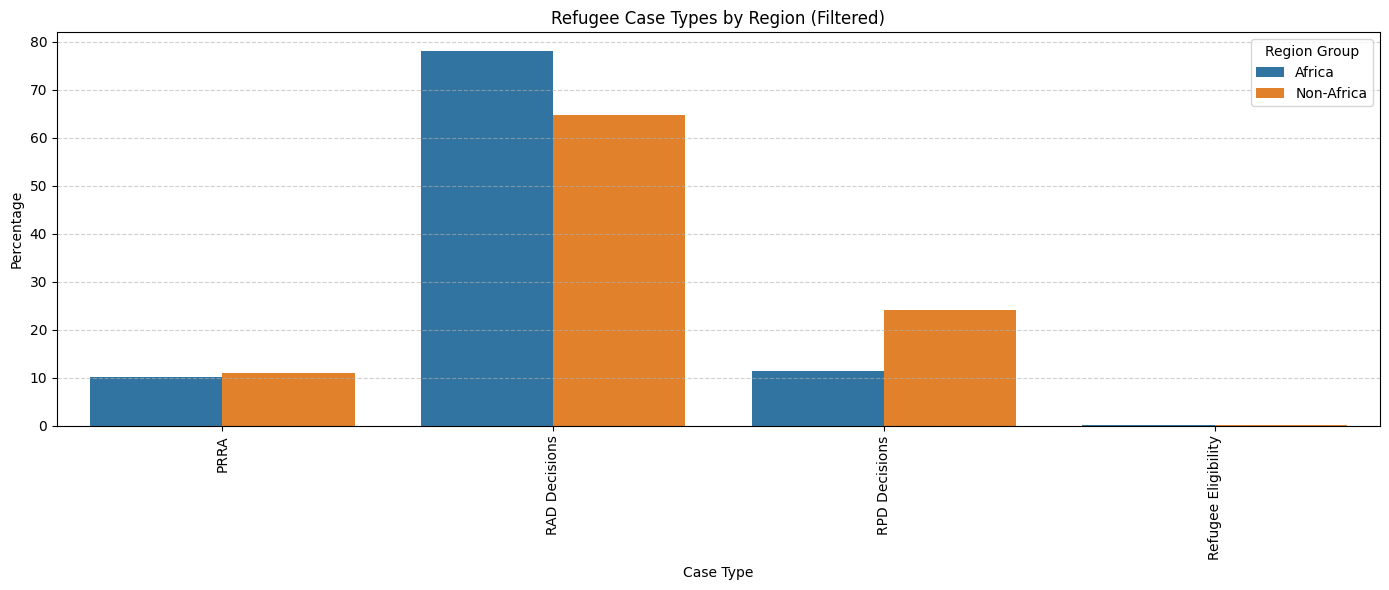

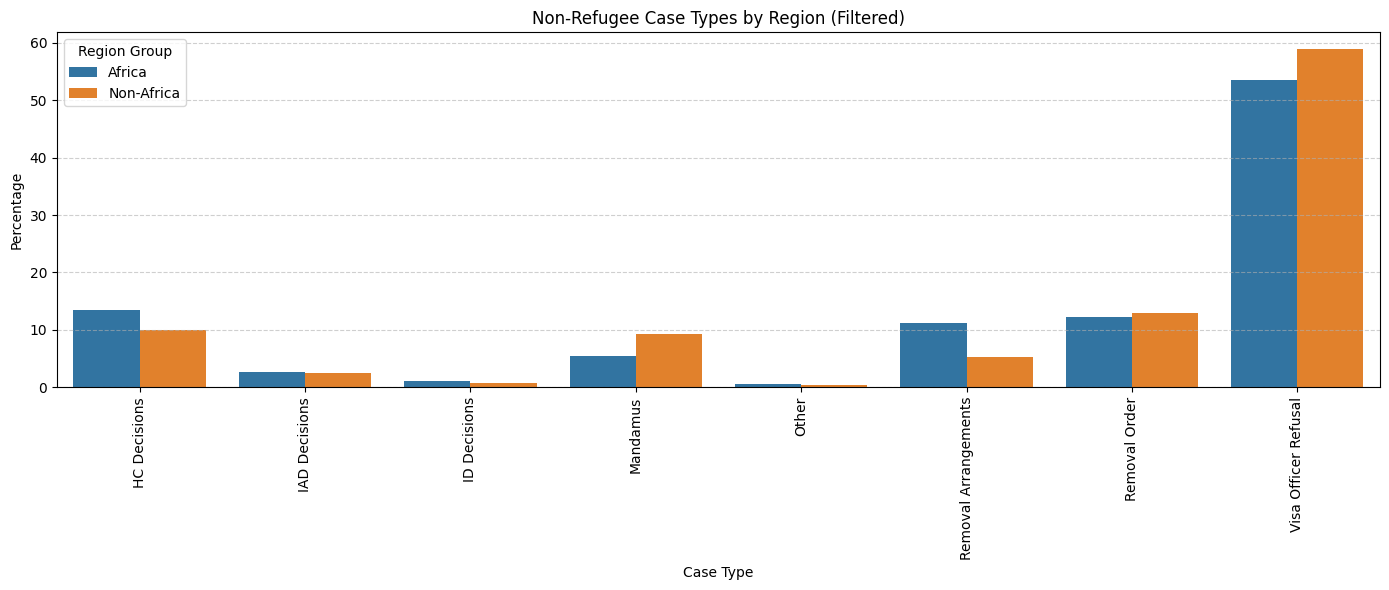

In [134]:
# Define refugee case types and exclusions
refugee_case_types = ['RPD Decisions', 'RAD Decisions', 'PRRA', 'Refugee Eligibility']
exclude_case_types = ['Citizenship Program', 'DFN', 'Danger Opinions', 'Detention', 'In-Canada Classes']

# Classify as Refugee or Non-Refugee
df['Case Group'] = df['LIT Case Type Group Desc'].apply(
    lambda x: 'Refugee' if x in refugee_case_types else 'Non-Refugee'
)
df['Region Group'] = df['Region'].apply(lambda x: 'Africa' if x == 'Africa' else 'Non-Africa')

def plot_case_type_composition(data, title):
    # Exclude unwanted case types
    data = data[~data['LIT Case Type Group Desc'].isin(exclude_case_types)]

    grouped = (
        data.groupby(['Region Group', 'LIT Case Type Group Desc'])['LIT Litigation Count']
        .sum()
        .reset_index()
    )
    grouped['Percentage'] = grouped.groupby('Region Group')['LIT Litigation Count'].transform(
        lambda x: (x / x.sum()) * 100
    ).round(1)

    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=grouped,
        x='LIT Case Type Group Desc',
        y='Percentage',
        hue='Region Group'
    )
    plt.title(title)
    plt.xlabel('Case Type')
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot refugee case types
plot_case_type_composition(df[df['Case Group'] == 'Refugee'], "Refugee Case Types by Region (Filtered)")

# Plot non-refugee case types
plot_case_type_composition(df[df['Case Group'] == 'Non-Refugee'], "Non-Refugee Case Types by Region (Filtered)")

#### Drafts, disregard

Breakdown Leave Decision

top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum()

import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# focusing on top 5 decisions

top_5_decisions = (
    top_10['LIT Leave Decision Desc']
    .value_counts()
    .head(5)
    .index.tolist()
)

top_decs = top_10[top_10['LIT Leave Decision Desc'].isin(top_5_decisions)]

import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_decs.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Zooming in to look at India

india_only = top_decs[top_decs['Country of Citizenship'] == 'India']

# set categorical order for Period
period_order = ['Pre-COVID', 'COVID', 'Post-COVID']
india_grouped['Period'] = pd.Categorical(india_grouped['Period'], categories=period_order, ordered=True)

# plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=india_grouped,
    x='Period',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Top 5 Leave Decisions in India by Period')
plt.xlabel('Period')
plt.ylabel('Total Litigation Count')
plt.legend(title='Decision Type')
plt.tight_layout()
plt.show()